In [20]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import datetime
import matplotlib as mpl
fp = mpl.font_manager.FontProperties(family='Tahoma',size=13)

%matplotlib inline

#Import Data

แปลง DOB และ System Car Code Date ให้เป็น วัน

In [47]:
df = pd.read_excel('Data20230120.xlsx', parse_dates=['DOB','System CAR Code Date'])
df.head()

,Application Number,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Gender,DOB,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,Vehicle Model,Vehicle Release Year,Vehicle Sub Model,Evaluation Amount,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,Day Past Due (Aging),Application Status
0,25651226INSI00001,7500.0,0.00,12,M,1992-12-05,พนักงานบริษัท,10000.00,PU,TOYOTA,SPORT CRUISER,2002,EP,225500,S1,2022-12-26,S1,4,APPLICATION_COMPLETED
1,25650620ULMB00004,20000.0,13492.22,12,M,1986-08-15,อื่นๆ,25000.09,MC,HONDA,PCX 160,2018,BV,64500,S1,2022-06-20,S1,0,APPLICATION_COMPLETED
2,25650620ULCR00002,130000.0,125931.40,60,F,1996-04-30,อื่นๆ,15000.00,CAR,HONDA,CIVIC,2005,DK,220500,S1,2022-06-20,S1,0,APPLICATION_COMPLETED
3,25650621ULMB00001,70000.0,60867.83,36,M,1979-04-01,อื่นๆ,20000.00,MC,YAMAHA,N-MAX 155,2021,CE,81500,S1,2022-06-21,S1,0,APPLICATION_COMPLETED
4,25650621ULMB00011,3000.0,1585.66,13,M,1967-05-04,STREET VENDOR,30000.00,MC,HONDA,WAVE 125 I,2010,AY,20000,S1,2022-06-21,S1,0,APPLICATION_COMPLETED


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53496 entries, 0 to 53495
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Application Number             53496 non-null  object        
 1   Principal Approve Amount       53496 non-null  float64       
 2   Principal Amount               53496 non-null  float64       
 3   Repayment Tenor Month Number   53496 non-null  int64         
 4   Gender                         53496 non-null  object        
 5   DOB                            53496 non-null  datetime64[ns]
 6   Occupation Description         53496 non-null  object        
 7   Total Income Amount (Month)    53496 non-null  float64       
 8   Collateral Type Code           53496 non-null  object        
 9   Vehicle Brand                  53496 non-null  object        
 10  Vehicle Model                  53496 non-null  object        
 11  Vehicle Release

In [49]:
df.describe().round(2)

,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Total Income Amount (Month),Vehicle Release Year,Evaluation Amount,Day Past Due (Aging)
count,53496.00,53496.00,53496.00,53496.00,53496.00,53496.00,53496.00
mean,101640.79,98746.29,39.39,25084.92,2012.50,164745.58,1.13
std,101697.95,101152.59,17.98,114036.90,5.52,159732.24,7.42
min,3000.00,-2253.34,1.00,0.00,1976.00,5000.00,0.00
25%,26000.00,24900.00,24.00,15000.00,2008.00,38900.00,0.00
50%,48000.00,40884.99,36.00,20000.00,2013.00,117000.00,0.00
75%,165000.00,160000.00,60.00,30000.00,2017.00,261125.00,0.00
max,2000000.00,2000000.00,120.00,20000000.00,2022.00,3282500.00,147.00


#Data Preparation

##แปลงชื่อ Columns และ แปลง DOB เป็น อายุ

In [50]:
df.rename(columns={'Day Past Due (Aging)':'DPD'}, inplace=True)
df['age'] = pd.to_datetime('today').year - df.DOB.dt.year

##คำนวณ % ของค่าว่าง

In [51]:
df = df.drop(['DOB','Vehicle Sub Model','System CAR Code Date','Application Status'], axis=1)
df.head()

,Application Number,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Gender,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,Vehicle Model,Vehicle Release Year,Evaluation Amount,System CAR Code (Daily),Final CAR Code Previous Month,DPD,age
0,25651226INSI00001,7500.0,0.00,12,M,พนักงานบริษัท,10000.00,PU,TOYOTA,SPORT CRUISER,2002,225500,S1,S1,4,31
1,25650620ULMB00004,20000.0,13492.22,12,M,อื่นๆ,25000.09,MC,HONDA,PCX 160,2018,64500,S1,S1,0,37
2,25650620ULCR00002,130000.0,125931.40,60,F,อื่นๆ,15000.00,CAR,HONDA,CIVIC,2005,220500,S1,S1,0,27
3,25650621ULMB00001,70000.0,60867.83,36,M,อื่นๆ,20000.00,MC,YAMAHA,N-MAX 155,2021,81500,S1,S1,0,44
4,25650621ULMB00011,3000.0,1585.66,13,M,STREET VENDOR,30000.00,MC,HONDA,WAVE 125 I,2010,20000,S1,S1,0,56


In [52]:
df = df.drop_duplicates('Application Number')
df.shape

(53423, 16)

In [53]:
df = df.drop(['Application Number'], axis=1)
df.head()

,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Gender,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,Vehicle Model,Vehicle Release Year,Evaluation Amount,System CAR Code (Daily),Final CAR Code Previous Month,DPD,age
0,7500.0,0.00,12,M,พนักงานบริษัท,10000.00,PU,TOYOTA,SPORT CRUISER,2002,225500,S1,S1,4,31
1,20000.0,13492.22,12,M,อื่นๆ,25000.09,MC,HONDA,PCX 160,2018,64500,S1,S1,0,37
2,130000.0,125931.40,60,F,อื่นๆ,15000.00,CAR,HONDA,CIVIC,2005,220500,S1,S1,0,27
3,70000.0,60867.83,36,M,อื่นๆ,20000.00,MC,YAMAHA,N-MAX 155,2021,81500,S1,S1,0,44
4,3000.0,1585.66,13,M,STREET VENDOR,30000.00,MC,HONDA,WAVE 125 I,2010,20000,S1,S1,0,56


In [54]:
missing = df.isnull().sum()
missing

Principal Approve Amount         0
Principal Amount                 0
Repayment Tenor Month Number     0
Gender                           0
Occupation Description           0
Total Income Amount (Month)      0
Collateral Type Code             0
Vehicle Brand                    0
Vehicle Model                    0
Vehicle Release Year             0
Evaluation Amount                0
System CAR Code (Daily)          0
Final CAR Code Previous Month    0
DPD                              0
age                              0
dtype: int64

In [55]:
missing = df.isnull().sum()
missing

Principal Approve Amount         0
Principal Amount                 0
Repayment Tenor Month Number     0
Gender                           0
Occupation Description           0
Total Income Amount (Month)      0
Collateral Type Code             0
Vehicle Brand                    0
Vehicle Model                    0
Vehicle Release Year             0
Evaluation Amount                0
System CAR Code (Daily)          0
Final CAR Code Previous Month    0
DPD                              0
age                              0
dtype: int64

In [56]:
df.dropna(subset=['Collateral Type Code','Vehicle Brand','Vehicle Model','Vehicle Release Year','Evaluation Amount'], inplace=True)

In [57]:
df.isnull().sum()

Principal Approve Amount         0
Principal Amount                 0
Repayment Tenor Month Number     0
Gender                           0
Occupation Description           0
Total Income Amount (Month)      0
Collateral Type Code             0
Vehicle Brand                    0
Vehicle Model                    0
Vehicle Release Year             0
Evaluation Amount                0
System CAR Code (Daily)          0
Final CAR Code Previous Month    0
DPD                              0
age                              0
dtype: int64

In [58]:
missing_columns = list(missing[missing > 0].index)
missing_columns

[]

In [59]:
total_missing = missing[missing > 0]
total_missing

Series([], dtype: int64)

In [60]:
missing_df = pd.DataFrame(total_missing, columns=['number_of_missing_values'])
missing_df

,number_of_missing_values


In [61]:
missing_df['percent'] = total_missing * 100 / len(df)
missing_df

,number_of_missing_values,percent


In [62]:
'''df.dropna(subset=['Principal Approve Amount','Principal Amount','Outstanding Balance Amount',
                  'Repayment Tenor Month Number','Collateral Type Code','Vehicle Brand','Vehicle Model','Vehicle Release Year',
                  'Vehicle Sub Model','Evaluation Amount','DPD'], inplace=True)'''

"df.dropna(subset=['Principal Approve Amount','Principal Amount','Outstanding Balance Amount',\n                  'Repayment Tenor Month Number','Collateral Type Code','Vehicle Brand','Vehicle Model','Vehicle Release Year',\n                  'Vehicle Sub Model','Evaluation Amount','DPD'], inplace=True)"

In [63]:
# df[ (df['Collateral Type Code'] != 'CAR')&(df['Collateral Type Code'] != 'PU')&(df['Collateral Type Code'] != 'MC')]

In [64]:
# indexApp = df[(df['Collateral Type Code'] != 'CAR')&(df['Collateral Type Code'] != 'PU')&(df['Collateral Type Code'] != 'MC')].index
# df.drop(indexApp , inplace=True)

In [65]:
df.shape

(53423, 15)

In [66]:
#เพิ่ม column อายุรถ
df['Vehicle Age'] = pd.to_datetime('today').year - df['Vehicle Release Year']
df

,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Gender,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,Vehicle Model,Vehicle Release Year,Evaluation Amount,System CAR Code (Daily),Final CAR Code Previous Month,DPD,age,Vehicle Age
0,7500.0,0.00,12,M,พนักงานบริษัท,10000.00,PU,TOYOTA,SPORT CRUISER,2002,225500,S1,S1,4,31,21
1,20000.0,13492.22,12,M,อื่นๆ,25000.09,MC,HONDA,PCX 160,2018,64500,S1,S1,0,37,5
2,130000.0,125931.40,60,F,อื่นๆ,15000.00,CAR,HONDA,CIVIC,2005,220500,S1,S1,0,27,18
3,70000.0,60867.83,36,M,อื่นๆ,20000.00,MC,YAMAHA,N-MAX 155,2021,81500,S1,S1,0,44,2
4,3000.0,1585.66,13,M,STREET VENDOR,30000.00,MC,HONDA,WAVE 125 I,2010,20000,S1,S1,0,56,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53491,40000.0,37993.41,24,M,เกษตรกร,60000.00,MC,HONDA,WAVE 125 I,2022,53000,S1,S1,0,46,1
53492,140000.0,140000.00,60,M,เกษตรกร,24500.00,PU,ISUZU,D-MAX,2006,176000,S1,S1,0,58,17
53493,61800.0,61800.00,36,F,STREET VENDOR,45000.00,MC,HONDA,PCX 160,2021,82500,S1,S1,0,40,2
53494,180000.0,180000.00,60,M,พนักงานรัฐวิสาหกิจ,32000.00,PU,MAZDA,BT-50PRO,2012,280000,S1,S1,0,49,11


In [67]:
df['Collateral Type Code'].value_counts()

MC       25938
PU       14475
CAR      12311
VAN        388
TRUCK      311
Name: Collateral Type Code, dtype: int64

In [68]:
'''df[df['Application Number'].duplicated()]'''

"df[df['Application Number'].duplicated()]"

In [69]:
'''df.drop_duplicates(['Application Number'], inplace=True)

df.reset_index(drop=True, inplace=True)'''

"df.drop_duplicates(['Application Number'], inplace=True)\n\ndf.reset_index(drop=True, inplace=True)"

In [70]:
'''df['Insurance Policy Number'].fillna(0, inplace=True)'''

"df['Insurance Policy Number'].fillna(0, inplace=True)"

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53423 entries, 0 to 53495
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Principal Approve Amount       53423 non-null  float64
 1   Principal Amount               53423 non-null  float64
 2   Repayment Tenor Month Number   53423 non-null  int64  
 3   Gender                         53423 non-null  object 
 4   Occupation Description         53423 non-null  object 
 5   Total Income Amount (Month)    53423 non-null  float64
 6   Collateral Type Code           53423 non-null  object 
 7   Vehicle Brand                  53423 non-null  object 
 8   Vehicle Model                  53423 non-null  object 
 9   Vehicle Release Year           53423 non-null  int64  
 10  Evaluation Amount              53423 non-null  int64  
 11  System CAR Code (Daily)        53423 non-null  object 
 12  Final CAR Code Previous Month  53423 non-null 

In [72]:
df.isna().sum()

Principal Approve Amount         0
Principal Amount                 0
Repayment Tenor Month Number     0
Gender                           0
Occupation Description           0
Total Income Amount (Month)      0
Collateral Type Code             0
Vehicle Brand                    0
Vehicle Model                    0
Vehicle Release Year             0
Evaluation Amount                0
System CAR Code (Daily)          0
Final CAR Code Previous Month    0
DPD                              0
age                              0
Vehicle Age                      0
dtype: int64

In [73]:
'''df['Gender'] = df['Gender'].fillna(method='ffill')'''

"df['Gender'] = df['Gender'].fillna(method='ffill')"

In [74]:
df['Repayment Tenor Month Number']=df['Repayment Tenor Month Number'].astype(int)
df['Vehicle Release Year']=df['Vehicle Release Year'].astype(int)
df['DPD']=df['DPD'].astype(np.int64)
df['Vehicle Release Year']=df['Vehicle Release Year'].astype(np.int64)
df['Vehicle Age']=df['Vehicle Age'].astype(np.int64)

In [75]:
print(df.shape)
df.tail()

(53423, 16)


,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Gender,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,Vehicle Model,Vehicle Release Year,Evaluation Amount,System CAR Code (Daily),Final CAR Code Previous Month,DPD,age,Vehicle Age
53491,40000.0,37993.41,24,M,เกษตรกร,60000.0,MC,HONDA,WAVE 125 I,2022,53000,S1,S1,0,46,1
53492,140000.0,140000.00,60,M,เกษตรกร,24500.0,PU,ISUZU,D-MAX,2006,176000,S1,S1,0,58,17
53493,61800.0,61800.00,36,F,STREET VENDOR,45000.0,MC,HONDA,PCX 160,2021,82500,S1,S1,0,40,2
53494,180000.0,180000.00,60,M,พนักงานรัฐวิสาหกิจ,32000.0,PU,MAZDA,BT-50PRO,2012,280000,S1,S1,0,49,11
53495,123000.0,123000.00,60,M,อื่นๆ,60000.0,CAR,HONDA,JAZZ,2005,164000,S1,S1,0,33,18


##หาค่าที่เป็น NPL

In [76]:
df.head()

,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Gender,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,Vehicle Model,Vehicle Release Year,Evaluation Amount,System CAR Code (Daily),Final CAR Code Previous Month,DPD,age,Vehicle Age
0,7500.0,0.00,12,M,พนักงานบริษัท,10000.00,PU,TOYOTA,SPORT CRUISER,2002,225500,S1,S1,4,31,21
1,20000.0,13492.22,12,M,อื่นๆ,25000.09,MC,HONDA,PCX 160,2018,64500,S1,S1,0,37,5
2,130000.0,125931.40,60,F,อื่นๆ,15000.00,CAR,HONDA,CIVIC,2005,220500,S1,S1,0,27,18
3,70000.0,60867.83,36,M,อื่นๆ,20000.00,MC,YAMAHA,N-MAX 155,2021,81500,S1,S1,0,44,2
4,3000.0,1585.66,13,M,STREET VENDOR,30000.00,MC,HONDA,WAVE 125 I,2010,20000,S1,S1,0,56,13


In [77]:
df['Collateral Type Code'].value_counts()

MC       25938
PU       14475
CAR      12311
VAN        388
TRUCK      311
Name: Collateral Type Code, dtype: int64

In [78]:
df0 = df[df['DPD']==0]
df0.shape

(51355, 16)

In [79]:
df1_30 = df[(df['DPD'] >= 1) & (df['DPD'] <= 30)]
df1_30.shape

(1469, 16)

In [80]:
df31_60 = df[(df['DPD'] >= 30) & (df['DPD'] <= 60)]
df31_60.shape

(442, 16)

In [81]:
df61_90 = df[(df['DPD'] >= 60) & (df['DPD'] <= 90)]
df61_90.shape

(100, 16)

In [82]:
df90up = df[df['DPD']>=90]
df90up.shape

(57, 16)

In [83]:
print("DPD 0",df0.shape)
print("df1_30",df1_30.shape)
print("df31_60",df31_60.shape)
print("df61_90",df61_90.shape)
print("df90up",df90up.shape)

DPD 0 (51355, 16)
df1_30 (1469, 16)
df31_60 (442, 16)
df61_90 (100, 16)
df90up (57, 16)


In [84]:
df['DPD'].value_counts()

0      51355
25       368
2        267
55       177
22       165
7        136
28       133
13       112
4        104
17        70
58        64
19        62
52        52
10        52
47        42
32        29
43        22
89        22
37        20
40        19
93        15
63        15
78        13
83        13
49        11
74        10
116       10
86         9
108        7
65         6
34         6
98         5
68         5
95         4
113        4
104        4
71         4
80         3
110        3
119        2
147        1
132        1
124        1
Name: DPD, dtype: int64

In [85]:
from pandas.api.types import CategoricalDtype
#bins = [0,30,60]
pl_npl = ['PL','NPL']
df['DPD'] = pd.cut(df.DPD,
                                    bins = [0,30,72],
                                    labels=pl_npl, 
                                    right=True).astype(CategoricalDtype(pl_npl, ordered=True))
df.sort_values(by='DPD')

,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Gender,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,Vehicle Model,Vehicle Release Year,Evaluation Amount,System CAR Code (Daily),Final CAR Code Previous Month,DPD,age,Vehicle Age
0,7500.0,0.00,12,M,พนักงานบริษัท,10000.0,PU,TOYOTA,SPORT CRUISER,2002,225500,S1,S1,PL,31,21
17083,140000.0,140000.00,48,M,อื่นๆ,13000.0,PU,MITSUBISHI,TRITON,2008,199500,S1,S1,PL,33,15
17055,33000.0,32599.61,36,M,STREET VENDOR,13000.0,MC,YAMAHA,N-MAX 155,2018,51000,S2,S1,PL,52,5
17035,125000.0,125000.00,60,M,เกษตรกร,30000.0,PU,ISUZU,D-MAX,2002,184000,S1,S1,PL,63,21
17013,90000.0,90000.00,60,M,STREET VENDOR,28600.0,CAR,TOYOTA,VIOS,2003,124500,S2,S1,PL,36,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53491,40000.0,37993.41,24,M,เกษตรกร,60000.0,MC,HONDA,WAVE 125 I,2022,53000,S1,S1,NaN,46,1
53492,140000.0,140000.00,60,M,เกษตรกร,24500.0,PU,ISUZU,D-MAX,2006,176000,S1,S1,NaN,58,17
53493,61800.0,61800.00,36,F,STREET VENDOR,45000.0,MC,HONDA,PCX 160,2021,82500,S1,S1,NaN,40,2
53494,180000.0,180000.00,60,M,พนักงานรัฐวิสาหกิจ,32000.0,PU,MAZDA,BT-50PRO,2012,280000,S1,S1,NaN,49,11


In [86]:
df.DPD.unique()

['PL', NaN, 'NPL']
Categories (2, object): ['PL' < 'NPL']

In [87]:
'''bins = [0,30,60]
pl_npl = ['PL','NPL']

dpd_cate = pd.cut(df.DPD, bins, labels=pl_npl)
dpd_cate'''

"bins = [0,30,60]\npl_npl = ['PL','NPL']\n\ndpd_cate = pd.cut(df.DPD, bins, labels=pl_npl)\ndpd_cate"

In [88]:
df['DPD'].value_counts()

PL     1469
NPL     472
Name: DPD, dtype: int64

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53423 entries, 0 to 53495
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Principal Approve Amount       53423 non-null  float64 
 1   Principal Amount               53423 non-null  float64 
 2   Repayment Tenor Month Number   53423 non-null  int32   
 3   Gender                         53423 non-null  object  
 4   Occupation Description         53423 non-null  object  
 5   Total Income Amount (Month)    53423 non-null  float64 
 6   Collateral Type Code           53423 non-null  object  
 7   Vehicle Brand                  53423 non-null  object  
 8   Vehicle Model                  53423 non-null  object  
 9   Vehicle Release Year           53423 non-null  int64   
 10  Evaluation Amount              53423 non-null  int64   
 11  System CAR Code (Daily)        53423 non-null  object  
 12  Final CAR Code Previous Month  5

In [90]:
df[(df['System CAR Code (Daily)']=='S1')]

,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Gender,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,Vehicle Model,Vehicle Release Year,Evaluation Amount,System CAR Code (Daily),Final CAR Code Previous Month,DPD,age,Vehicle Age
0,7500.0,0.00,12,M,พนักงานบริษัท,10000.00,PU,TOYOTA,SPORT CRUISER,2002,225500,S1,S1,PL,31,21
1,20000.0,13492.22,12,M,อื่นๆ,25000.09,MC,HONDA,PCX 160,2018,64500,S1,S1,NaN,37,5
2,130000.0,125931.40,60,F,อื่นๆ,15000.00,CAR,HONDA,CIVIC,2005,220500,S1,S1,NaN,27,18
3,70000.0,60867.83,36,M,อื่นๆ,20000.00,MC,YAMAHA,N-MAX 155,2021,81500,S1,S1,NaN,44,2
4,3000.0,1585.66,13,M,STREET VENDOR,30000.00,MC,HONDA,WAVE 125 I,2010,20000,S1,S1,NaN,56,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53491,40000.0,37993.41,24,M,เกษตรกร,60000.00,MC,HONDA,WAVE 125 I,2022,53000,S1,S1,NaN,46,1
53492,140000.0,140000.00,60,M,เกษตรกร,24500.00,PU,ISUZU,D-MAX,2006,176000,S1,S1,NaN,58,17
53493,61800.0,61800.00,36,F,STREET VENDOR,45000.00,MC,HONDA,PCX 160,2021,82500,S1,S1,NaN,40,2
53494,180000.0,180000.00,60,M,พนักงานรัฐวิสาหกิจ,32000.00,PU,MAZDA,BT-50PRO,2012,280000,S1,S1,NaN,49,11


In [91]:
df[(df['System CAR Code (Daily)']=='S2')]

,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Gender,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,Vehicle Model,Vehicle Release Year,Evaluation Amount,System CAR Code (Daily),Final CAR Code Previous Month,DPD,age,Vehicle Age
22,20000.00,18434.00,12,M,อื่นๆ,15000.0,MC,HONDA,WAVE 110I,2019,34500,S2,S3,NaN,29,4
61,28000.00,26483.19,24,F,อื่นๆ,15000.0,MC,HONDA,DREAM 110,2015,44000,S2,S1,NPL,34,8
69,14000.00,13975.46,36,F,พนักงานบริษัท,13000.0,MC,HONDA,WAVE 110 I,2009,19000,S2,S1,NPL,41,14
72,30000.00,29959.48,24,F,อื่นๆ,20000.0,MC,YAMAHA,GRAND FILANO 125,2019,46500,S2,S1,PL,44,4
94,90000.00,89933.60,24,M,พนักงานบริษัท,15000.0,PU,MITSUBISHI,TRITON,2012,157000,S2,S1,PL,57,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53177,250000.00,250000.00,120,F,พนักงานบริษัท,15000.0,CAR,MAZDA,2,2017,361500,S2,S2,NaN,30,6
53178,183700.00,183700.00,84,F,อื่นๆ,10000.0,PU,MITSUBISHI,TRITON,2011,245000,S2,S2,NaN,44,12
53179,99947.40,99947.40,72,F,พนักงานรัฐวิสาหกิจ,33000.0,CAR,FORD,FIESTA,2011,150000,S2,S2,NaN,42,12
53180,325553.47,325553.47,60,F,พนักงานบริษัท,18000.0,PU,ISUZU,D-MAX,2012,431500,S2,S2,NaN,44,11


##Data Selection

###นำข้อมูลผู้ประกอบการออกเนื่องจาก รายได้ที่กรอกมามี 100000 - 700000 จึงทำให้เกิด outliner:

In [92]:
'''df['Occupation Description'].unique()'''

"df['Occupation Description'].unique()"

In [93]:
'''df['Occupation Description'][[1,2]]'''

"df['Occupation Description'][[1,2]]"

In [94]:
df[(df['Occupation Description']=='ผู้ประกอบการ')]

,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Gender,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,Vehicle Model,Vehicle Release Year,Evaluation Amount,System CAR Code (Daily),Final CAR Code Previous Month,DPD,age,Vehicle Age


In [95]:
indexApp = df[ (df['Occupation Description'] == 'ผู้ประกอบการ')].index
df.drop(indexApp , inplace=True)
df

,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Gender,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,Vehicle Model,Vehicle Release Year,Evaluation Amount,System CAR Code (Daily),Final CAR Code Previous Month,DPD,age,Vehicle Age
0,7500.0,0.00,12,M,พนักงานบริษัท,10000.00,PU,TOYOTA,SPORT CRUISER,2002,225500,S1,S1,PL,31,21
1,20000.0,13492.22,12,M,อื่นๆ,25000.09,MC,HONDA,PCX 160,2018,64500,S1,S1,NaN,37,5
2,130000.0,125931.40,60,F,อื่นๆ,15000.00,CAR,HONDA,CIVIC,2005,220500,S1,S1,NaN,27,18
3,70000.0,60867.83,36,M,อื่นๆ,20000.00,MC,YAMAHA,N-MAX 155,2021,81500,S1,S1,NaN,44,2
4,3000.0,1585.66,13,M,STREET VENDOR,30000.00,MC,HONDA,WAVE 125 I,2010,20000,S1,S1,NaN,56,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53491,40000.0,37993.41,24,M,เกษตรกร,60000.00,MC,HONDA,WAVE 125 I,2022,53000,S1,S1,NaN,46,1
53492,140000.0,140000.00,60,M,เกษตรกร,24500.00,PU,ISUZU,D-MAX,2006,176000,S1,S1,NaN,58,17
53493,61800.0,61800.00,36,F,STREET VENDOR,45000.00,MC,HONDA,PCX 160,2021,82500,S1,S1,NaN,40,2
53494,180000.0,180000.00,60,M,พนักงานรัฐวิสาหกิจ,32000.00,PU,MAZDA,BT-50PRO,2012,280000,S1,S1,NaN,49,11


In [96]:
df.describe().round(2)

,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Total Income Amount (Month),Vehicle Release Year,Evaluation Amount,age,Vehicle Age
count,53423.00,53423.00,53423.00,53423.00,53423.00,53423.00,53423.00,53423.00
mean,101661.54,98783.49,39.39,25094.75,2012.50,164782.66,42.74,10.50
std,101712.75,101167.72,17.98,114113.68,5.52,159769.62,10.78,5.52
min,3000.00,-2253.34,1.00,0.00,1976.00,5000.00,21.00,1.00
25%,26000.00,24906.04,24.00,15000.00,2008.00,38900.00,34.00,6.00
50%,48000.00,40906.18,36.00,20000.00,2013.00,117000.00,42.00,10.00
75%,165000.00,160000.00,60.00,30000.00,2017.00,261500.00,51.00,15.00
max,2000000.00,2000000.00,120.00,20000000.00,2022.00,3282500.00,77.00,47.00


In [97]:
indexApp = df[ (df['Total Income Amount (Month)'] >= 100000)].index
df.drop(indexApp , inplace=True)

In [98]:
indexApp = df[ (df['Total Income Amount (Month)'] <= 6000)].index
df.drop(indexApp , inplace=True)

###Cleaning ข้อมูลจำนวนเดือนที่จะผ่อน

In [104]:
df['Repayment Tenor Month Number'].value_counts()

60     16284
36     13302
24      8205
12      4751
18      3672
48      2898
30      1511
42       264
72       157
84       113
13        10
19         7
31         3
35         2
80         1
52         1
100        1
26         1
17         1
55         1
62         1
43         1
63         1
34         1
Name: Repayment Tenor Month Number, dtype: int64

In [105]:
indexApp = df[ (df['Repayment Tenor Month Number'] == 1)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 3)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 4)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 14)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 15)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 20)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 25)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 28)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 32)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 37)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 38)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 40)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 49)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 50)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 54)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 56)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 61)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 96)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 108)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 120)].index
df.drop(indexApp , inplace=True)
df.head(15)

,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Gender,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,Vehicle Model,Vehicle Release Year,Evaluation Amount,System CAR Code (Daily),Final CAR Code Previous Month,DPD,age,Vehicle Age
0,7500.0,0.00,12,M,พนักงานบริษัท,10000.00,PU,TOYOTA,SPORT CRUISER,2002,225500,S1,S1,PL,31,21
1,20000.0,13492.22,12,M,อื่นๆ,25000.09,MC,HONDA,PCX 160,2018,64500,S1,S1,NaN,37,5
2,130000.0,125931.40,60,F,อื่นๆ,15000.00,CAR,HONDA,CIVIC,2005,220500,S1,S1,NaN,27,18
3,70000.0,60867.83,36,M,อื่นๆ,20000.00,MC,YAMAHA,N-MAX 155,2021,81500,S1,S1,NaN,44,2
4,3000.0,1585.66,13,M,STREET VENDOR,30000.00,MC,HONDA,WAVE 125 I,2010,20000,S1,S1,NaN,56,13
5,22700.0,19307.33,24,M,พนักงานบริษัท,13000.00,MC,YAMAHA,FINO (MLEKE),2010,35000,S1,S1,NaN,35,13
6,5000.0,1948.46,18,F,พนักงานบริษัท,20000.00,MC,YAMAHA,FINO (MLEKE),2009,35000,S1,S1,NaN,39,14
7,10000.0,6199.28,12,F,อื่นๆ,10000.00,MC,YAMAHA,FINO (4DO),2009,20000,S1,S1,NaN,61,14
8,70000.0,69977.59,24,M,อื่นๆ,23000.00,MC,HONDA,ADV 150,2020,80500,S1,S1,NaN,52,3
9,15000.0,14949.59,24,M,พนักงานบริษัท,20000.00,MC,HONDA,WAVE 110I,2013,20500,S1,S1,NaN,29,10


In [106]:
df['Repayment Tenor Month Number'].value_counts()

60     16284
36     13302
24      8205
12      4751
18      3672
48      2898
30      1511
42       264
72       157
84       113
13        10
19         7
31         3
35         2
80         1
52         1
100        1
26         1
17         1
55         1
62         1
43         1
63         1
34         1
Name: Repayment Tenor Month Number, dtype: int64

###ข้อมูลที่เหลือหลังจากถูกการ Cleaning

In [107]:
df.shape

(51189, 16)

In [ ]:
df[(df['DPD']=='PL')]

,Application Number,Principal Approve Amount,Principal Amount,Outstanding Balance Amount,Repayment Tenor Month Number,Gender,DOB,Occupation Description,Total Income Amount (Month),Collateral Type Code,...,Vehicle Sub Model,Evaluation Amount,Insurance Policy Number,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,Application Status,age,Vehicle Age
0,25650701REUC00002,163800.0,163800.00,163800.00,48,F,1978-06-27,STREET VENDOR,50000.0,CAR,...,AT,234000.0,NLG224034612,S1,2022-07-01,S1,PL,APPLICATION_COMPLETED,44,5
1,25650701REUC00003,127500.0,127438.50,127438.50,60,F,1986-07-04,STREET VENDOR,15000.0,CAR,...,DH,170000.0,NLG224034615,S1,2022-07-01,S1,PL,APPLICATION_COMPLETED,36,16
2,25650701REUC00004,223200.0,220986.53,220986.53,60,F,1977-05-28,พนักงานบริษัท,16000.0,PU,...,BC,343500.0,NLG224034666,S1,2022-07-01,S1,PL,APPLICATION_COMPLETED,45,8
5,25650701REUC00012,220000.0,220000.00,220000.00,48,F,1990-01-12,พนักงานบริษัท,18000.0,PU,...,AS,411500.0,NLG224034663,S1,2022-07-01,S1,PL,APPLICATION_COMPLETED,32,7
6,25650701REUC00016,276700.0,276700.00,276700.00,60,M,1989-03-01,พนักงานบริษัท,20000.0,CAR,...,AQ,366500.0,NLG224034616,S1,2022-07-01,S1,PL,APPLICATION_COMPLETED,33,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7738,25650808REUC00078,109800.0,109800.00,109910.00,60,M,1983-12-04,พนักงานบริษัท,15000.0,CAR,...,DJ,169000.0,NLG224078958,S1,2022-08-08,S1,PL,APPLICATION_COMPLETED,39,15
7739,25650808REUC00079,220000.0,220000.00,220220.00,60,M,1962-08-29,รับจ้างทั่วไป,17000.0,PU,...,CI,276000.0,NLG224078988,S1,2022-08-08,S1,PL,APPLICATION_COMPLETED,60,15
7740,25650808REUC00080,210000.0,210000.00,210220.00,60,M,1958-01-01,ข้าราชการพลเรือน,17800.0,CAR,...,DU,290000.0,NLG224078960,S1,2022-08-08,S1,PL,APPLICATION_COMPLETED,64,9
7741,25650808REUC00081,280000.0,280000.00,280280.00,60,M,1969-08-18,รับจ้างทั่วไป,15000.0,PU,...,EO,410000.0,NLG224078990,S1,2022-08-08,S1,PL,APPLICATION_COMPLETED,53,9


In [ ]:
df[(df['DPD']=='NPL')]

,Application Number,Principal Approve Amount,Principal Amount,Outstanding Balance Amount,Repayment Tenor Month Number,Gender,DOB,Occupation Description,Total Income Amount (Month),Collateral Type Code,...,Vehicle Sub Model,Evaluation Amount,Insurance Policy Number,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,Application Status,age,Vehicle Age
64,25650701ULCR00011,150000.0,150000.00,154290.00,60,M,1995-03-13,STREET VENDOR,25000.0,PU,...,CR,271000.0,NLG224034667,S2,2022-07-01,S2,NPL,APPLICATION_COMPLETED,27,12
88,25650701ULCR00060,250000.0,250000.00,258910.00,42,M,1987-06-23,พนักงานรัฐวิสาหกิจ,65000.0,PU,...,CL,386500.0,NLG224034610,S2,2022-07-01,S2,NPL,APPLICATION_COMPLETED,35,12
126,25650701ULMB00016,21000.0,19887.65,20310.18,18,M,1996-04-11,STREET VENDOR,15000.0,MC,...,BP,28000.0,NLG224034634,S2,2022-07-01,S2,NPL,APPLICATION_COMPLETED,26,5
148,25650701ULMB00058,46000.0,46000.00,47684.33,36,F,1986-07-27,รับจ้างทั่วไป,10000.0,MC,...,CQ,61500.0,NLG224034643,S2,2022-07-01,S2,NPL,APPLICATION_COMPLETED,36,5
151,25650701ULMB00063,23000.0,23000.00,23737.75,36,F,1991-04-12,STREET VENDOR,7000.0,MC,...,AD,35500.0,NLG224034644,S2,2022-07-01,S2,NPL,APPLICATION_COMPLETED,31,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,25650803ULCR00033,270000.0,270000.00,273410.10,60,F,1988-11-10,STREET VENDOR,25000.0,PU,...,CG,337500.0,NLG224078435,S2,2022-08-03,S2,NPL,APPLICATION_COMPLETED,34,13
6740,25650804REUC00113,31500.0,31500.00,32152.03,24,M,1986-09-21,รับจ้างทั่วไป,10000.0,CAR,...,AE,105000.0,NLG224078528,S2,2022-08-04,S2,NPL,APPLICATION_COMPLETED,36,19
7145,25650805REUM00052,33500.0,33500.00,34008.13,36,F,1991-09-23,รับจ้างทั่วไป,15000.0,MC,...,EI,45000.0,NLG224078684,S2,2022-08-05,S2,NPL,APPLICATION_COMPLETED,31,2
7592,25650806ULMB00104,9000.0,9000.00,9145.22,12,F,1986-01-22,พนักงานบริษัท,20000.0,MC,...,AE,12500.0,NLG224078772,S2,2022-08-06,S2,NPL,APPLICATION_COMPLETED,36,12


## Data Processing

##Data Transformation

###ทำการแบ่งข้อมูล จาก 6403 rows แบ่งมา 4% ของข้อมูลทั้งหมดของ PL ก่อนเข้าสู่ Machine Learning

In [ ]:
df_pl = df[df['DPD']=='PL'].sample(frac=0.04, replace=True, random_state=1)
df_pl.shape

(256, 23)

In [ ]:
df_npl = df.loc[df['DPD']!='PL']
df_npl.shape

(76, 23)

PL 256 rows

NPL 76 rows

total 332 rows

คิด % NPL ได้เท่ากับ 22.891%

In [ ]:
join_df = [df_pl,df_npl]
new_df = pd.concat(join_df, ignore_index=True)

In [ ]:
new_df['DPD'].describe()

count     332
unique      2
top        PL
freq      256
Name: DPD, dtype: object

In [ ]:
new_df['DPD'].value_counts()

PL     256
NPL     76
Name: DPD, dtype: int64

In [ ]:
new_df.to_csv('/content/drive/MyDrive/Colab Notebooks/IS/chaiyo_clean.csv')

In [ ]:
new_df.describe().round(2)

,Principal Approve Amount,Principal Amount,Outstanding Balance Amount,Repayment Tenor Month Number,Total Income Amount (Month),Vehicle Release Year,Evaluation Amount,age,Vehicle Age
count,332.00,332.00,332.00,332.00,332.00,332.00,332.00,332.00,332.00
mean,100384.19,100037.37,100952.85,37.46,21677.97,2012.38,154325.90,41.00,9.62
std,114182.35,114267.50,115361.20,17.35,11403.71,5.26,163956.98,10.80,5.26
min,3300.00,3159.50,3159.50,12.00,7000.00,1996.00,11000.00,20.00,0.00
25%,22750.00,22000.00,22476.06,24.00,14875.00,2008.00,35000.00,32.75,5.00
50%,35000.00,34165.72,34655.17,36.00,18150.00,2013.00,50500.00,40.00,9.00
75%,160000.00,160000.00,163076.36,60.00,26242.50,2017.00,254250.00,49.00,14.00
max,680000.00,680000.00,693901.29,60.00,66000.00,2022.00,856000.00,67.00,26.00


In [ ]:
new_df['Application Status'].value_counts()

APPLICATION_COMPLETED    332
Name: Application Status, dtype: int64

In [ ]:
new_df[(new_df['Application Status']=='APPLICATION_COMPLETED')]

,Application Number,Principal Approve Amount,Principal Amount,Outstanding Balance Amount,Repayment Tenor Month Number,Gender,DOB,Occupation Description,Total Income Amount (Month),Collateral Type Code,...,Vehicle Sub Model,Evaluation Amount,Insurance Policy Number,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,Application Status,age,Vehicle Age
0,25650802ULMB00021,32000.0,32000.00,32042.00,24,M,1982-08-02,พนักงานส่งเอกสาร,25000.0,MC,...,DI,43000.0,NLG224078269,S1,2022-08-02,S1,PL,APPLICATION_COMPLETED,40,4
1,25650703REUM00008,50000.0,49742.58,49742.58,36,F,1963-01-24,STREET VENDOR,50000.0,MC,...,AB,80500.0,NLG224064406,S1,2022-07-03,S1,PL,APPLICATION_COMPLETED,59,2
2,25650726ULMB00015,20000.0,20000.00,20020.00,24,F,1965-04-21,STREET VENDOR,20000.0,MC,...,AN,27000.0,NLG224077288,S1,2022-07-26,S1,PL,APPLICATION_COMPLETED,57,2
3,25650802ULMB00075,9000.0,9000.00,9009.00,12,F,1980-12-01,รับจ้างทั่วไป,15000.0,MC,...,AE,12000.0,NLG224078264,S1,2022-08-02,S1,PL,APPLICATION_COMPLETED,42,11
4,25650707ULCR00067,180000.0,180000.00,180000.00,60,M,1973-11-18,ข้าราชการพลเรือน,31000.0,PU,...,BD,283500.0,NLG224074677,S1,2022-07-07,S1,PL,APPLICATION_COMPLETED,49,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,25650803ULCR00033,270000.0,270000.00,273410.10,60,F,1988-11-10,STREET VENDOR,25000.0,PU,...,CG,337500.0,NLG224078435,S2,2022-08-03,S2,NPL,APPLICATION_COMPLETED,34,13
328,25650804REUC00113,31500.0,31500.00,32152.03,24,M,1986-09-21,รับจ้างทั่วไป,10000.0,CAR,...,AE,105000.0,NLG224078528,S2,2022-08-04,S2,NPL,APPLICATION_COMPLETED,36,19
329,25650805REUM00052,33500.0,33500.00,34008.13,36,F,1991-09-23,รับจ้างทั่วไป,15000.0,MC,...,EI,45000.0,NLG224078684,S2,2022-08-05,S2,NPL,APPLICATION_COMPLETED,31,2
330,25650806ULMB00104,9000.0,9000.00,9145.22,12,F,1986-01-22,พนักงานบริษัท,20000.0,MC,...,AE,12500.0,NLG224078772,S2,2022-08-06,S2,NPL,APPLICATION_COMPLETED,36,12


In [ ]:
category = ['Repayment Tenor Month Number','Gender','Occupation Description','Collateral Type Code','Vehicle Release Year','Vehicle Age','Total Income Amount (Month)','age','Evaluation Amount','Repayment Tenor Month Number','System CAR Code (Daily)','DPD','Application Status']

for i in category:
    print(f'{i}:{new_df[i].unique()}\n')

Repayment Tenor Month Number:[24 36 12 60 18 42 30 48 54]

Gender:['M' 'F']

Occupation Description:['พนักงานส่งเอกสาร' 'STREET VENDOR' 'รับจ้างทั่วไป' 'ข้าราชการพลเรือน'
 'พนักงานรัฐวิสาหกิจ' 'แม่บ้าน' 'เกษตรกร' 'พนักงานบริษัท' 'อาจารย์'
 'ข้าราชการทหาร' 'ข้าราชการตำรวจ' 'GOLDSMITHS' 'นักกฎหมาย' '*นักการเมือง'
 'เลี้ยงสัตว์' 'จักรยานยนต์รับจ้าง']

Collateral Type Code:['MC' 'PU' 'CAR']

Vehicle Release Year:[2018 2020 2011 2008 2014 2017 2015 2009 2012 2013 2005 2007 2010 1999
 2006 2019 2002 2004 2016 2003 2000 2021 2022 1996]

Vehicle Age:[ 4  2 11 14  8  5  7 13 10  9 17 15 12 23 16  3 20 18  6 19 22  1  0 26]

Total Income Amount (Month):[25000.   50000.   20000.   15000.   31000.   23700.   21000.    9000.
 12000.   18000.   65000.   30000.   40000.   10000.   12950.   34000.
 22148.   23000.   44000.   16380.   13000.   17000.   38000.   36405.
 14000.   45000.   42050.   19000.   55000.   27555.55 60000.   14500.
 35000.   12200.   29600.    7500.   41000.   18300.   22000.   1

In [ ]:
for i in category:
    print(f'{i}:{new_df[i].value_counts()}\n')

Repayment Tenor Month Number:60    102
36     82
24     59
12     41
18     22
48     11
30      9
42      5
54      1
Name: Repayment Tenor Month Number, dtype: int64

Gender:F    188
M    144
Name: Gender, dtype: int64

Occupation Description:STREET VENDOR         95
รับจ้างทั่วไป         83
พนักงานบริษัท         74
เกษตรกร               33
ข้าราชการพลเรือน      10
อาจารย์                8
พนักงานส่งเอกสาร       7
พนักงานรัฐวิสาหกิจ     6
ข้าราชการตำรวจ         4
ข้าราชการทหาร          3
แม่บ้าน                2
เลี้ยงสัตว์            2
จักรยานยนต์รับจ้าง     2
GOLDSMITHS             1
นักกฎหมาย              1
*นักการเมือง           1
Name: Occupation Description, dtype: int64

Collateral Type Code:MC     180
PU      82
CAR     70
Name: Collateral Type Code, dtype: int64

Vehicle Release Year:2019    29
2018    24
2012    24
2013    23
2017    21
2015    20
2010    19
2011    18
2008    18
2005    18
2014    17
2016    17
2007    16
2009    14
2020    12
2006    10
2004    10
2003   

###Q1-Q3 Boxplot

In [ ]:
cal_Q1 = new_df["Principal Amount"].quantile(0.25)
cal_Q3 = new_df["Principal Amount"].quantile(0.75)
cal_IQR = cal_Q3 - cal_Q1
cal_IQR

138000.0

In [ ]:
lower_limit = cal_Q1 - 1.5 * cal_IQR
upper_limit = cal_Q3 + 1.5 * cal_IQR
print('lower:', lower_limit, 'upper:', upper_limit)

lower: -185000.0 upper: 367000.0


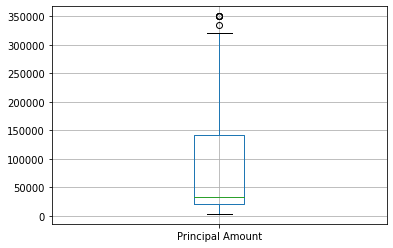

In [ ]:
df = new_df[(new_df['Principal Amount'] > lower_limit) & (new_df['Principal Amount'] < upper_limit)]
df.boxplot(column=['Principal Amount'])

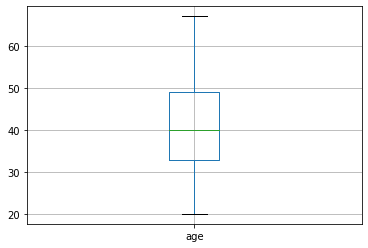

In [ ]:
df = new_df[(new_df['age'] > lower_limit) & (new_df['age'] < upper_limit)]
df.boxplot(column=['age'])

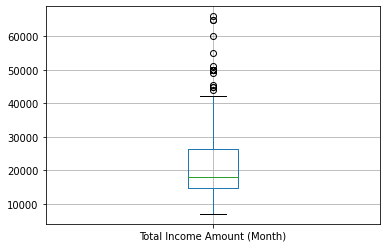

In [ ]:
df = new_df[(new_df['Total Income Amount (Month)'] > lower_limit) & (new_df['Total Income Amount (Month)'] < upper_limit)]
df.boxplot(column=['Total Income Amount (Month)'])

In [ ]:
df['Total Income Amount (Month)'].max()

66000.0

In [ ]:
df['Total Income Amount (Month)'].min()

7000.0

In [ ]:
cal_Q1 = new_df["Total Income Amount (Month)"].quantile(0.25)
cal_Q3 = new_df["Total Income Amount (Month)"].quantile(0.75)
cal_IQR = cal_Q3 - cal_Q1
cal_IQR

11367.5

In [ ]:
lower_limit = cal_Q1 - 1.5 * cal_IQR
upper_limit = cal_Q3 + 1.5 * cal_IQR
print('lower:', lower_limit, 'upper:', upper_limit)

lower: -2176.25 upper: 43293.75


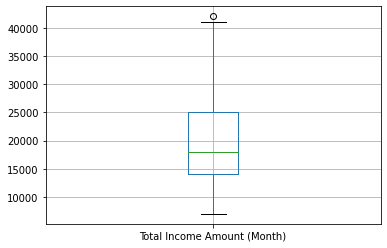

In [ ]:
df = new_df[(new_df['Total Income Amount (Month)'] > lower_limit) & (new_df['Total Income Amount (Month)'] < upper_limit)]
df.boxplot(column=['Total Income Amount (Month)'])

In [ ]:
df['Total Income Amount (Month)'].min()

7000.0

In [ ]:
df['Total Income Amount (Month)'].max()

42050.0

In [ ]:
df.describe().round(2)

,Principal Approve Amount,Principal Amount,Outstanding Balance Amount,Repayment Tenor Month Number,Total Income Amount (Month),Vehicle Release Year,Evaluation Amount,age,Vehicle Age
count,309.00,309.00,309.00,309.00,309.00,309.00,309.00,309.00,309.00
mean,90861.00,90502.92,91342.57,36.62,19438.46,2012.42,141453.72,40.64,9.58
std,103059.96,103118.40,104233.94,17.17,8019.41,5.27,150681.34,10.73,5.27
min,3300.00,3159.50,3159.50,12.00,7000.00,1996.00,11000.00,20.00,0.00
25%,21100.00,21000.00,21021.00,24.00,14000.00,2008.00,34900.00,32.00,5.00
50%,33000.00,33000.00,33033.00,36.00,17950.00,2013.00,46000.00,40.00,9.00
75%,150000.00,142600.00,145775.38,60.00,25000.00,2017.00,230000.00,48.00,14.00
max,677000.00,677000.00,693901.29,60.00,42050.00,2022.00,847000.00,67.00,26.00


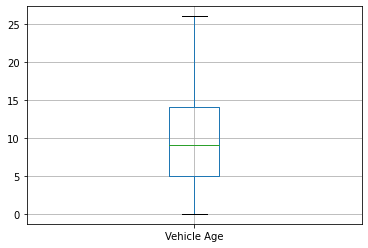

In [ ]:
df = new_df[(new_df['Vehicle Age'] > lower_limit) & (new_df['Vehicle Age'] < upper_limit)]
df.boxplot(column=['Vehicle Age'])

In [ ]:
df.describe().round(2)

,Principal Approve Amount,Principal Amount,Outstanding Balance Amount,Repayment Tenor Month Number,Total Income Amount (Month),Vehicle Release Year,Evaluation Amount,age,Vehicle Age
count,332.00,332.00,332.00,332.00,332.00,332.00,332.00,332.00,332.00
mean,100384.19,100037.37,100952.85,37.46,21677.97,2012.38,154325.90,41.00,9.62
std,114182.35,114267.50,115361.20,17.35,11403.71,5.26,163956.98,10.80,5.26
min,3300.00,3159.50,3159.50,12.00,7000.00,1996.00,11000.00,20.00,0.00
25%,22750.00,22000.00,22476.06,24.00,14875.00,2008.00,35000.00,32.75,5.00
50%,35000.00,34165.72,34655.17,36.00,18150.00,2013.00,50500.00,40.00,9.00
75%,160000.00,160000.00,163076.36,60.00,26242.50,2017.00,254250.00,49.00,14.00
max,680000.00,680000.00,693901.29,60.00,66000.00,2022.00,856000.00,67.00,26.00


###Data Visualize

####Categorical

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


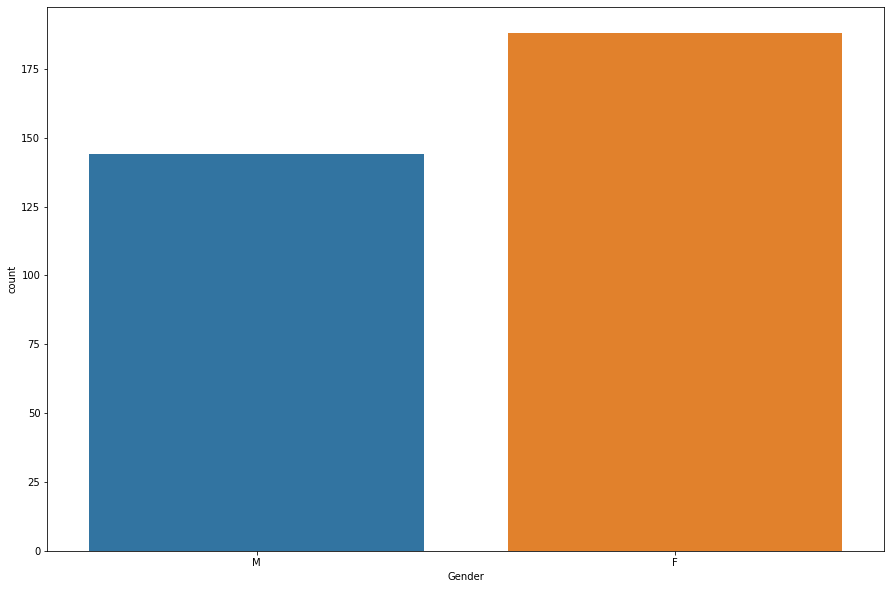

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(df['Gender'])

In [ ]:
plt.rcParams['font.family']='Tahoma'
plt.rcParams['font.size']=13

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3614 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3609 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3633 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3585 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3591 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3634 missing from current font.
  font.set_text(s

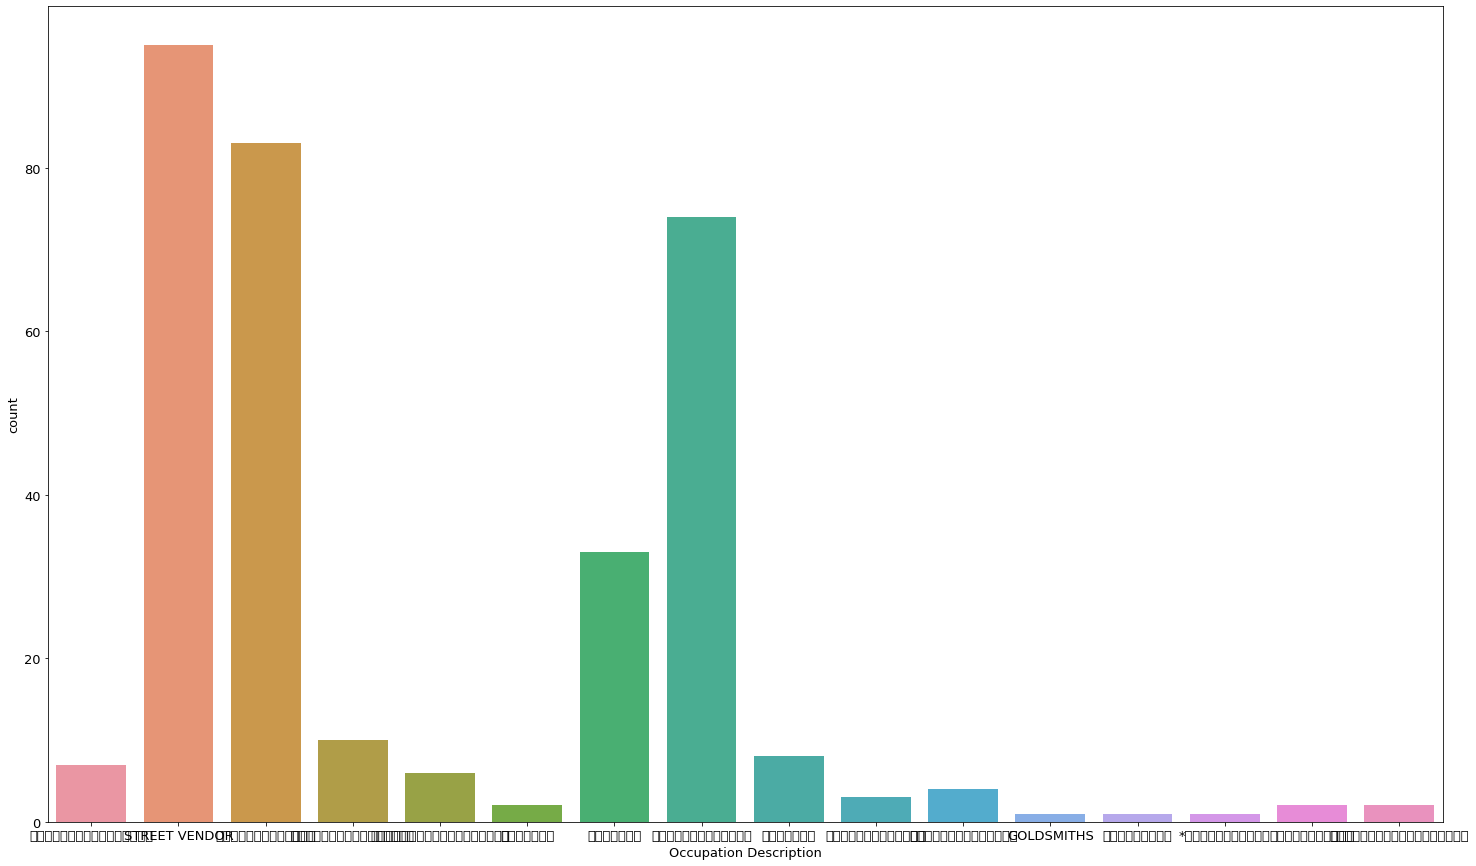

In [ ]:
plt.figure(figsize=(25,15))
sns.countplot(df['Occupation Description'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


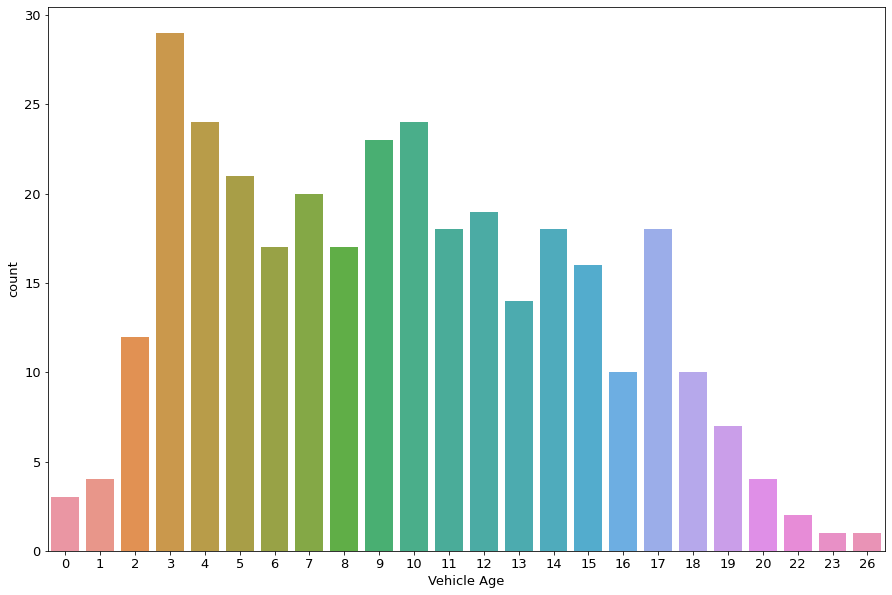

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(df['Vehicle Age'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


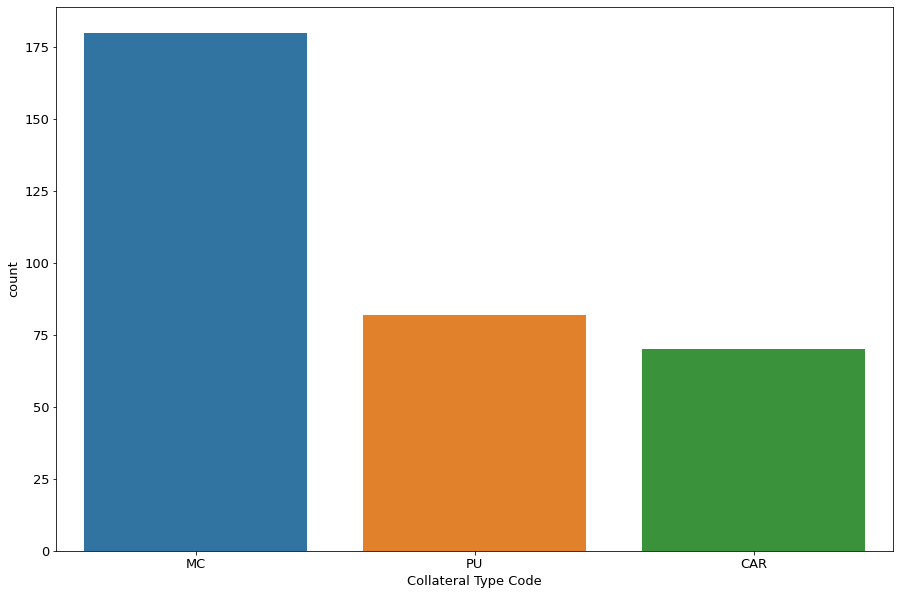

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(df['Collateral Type Code'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


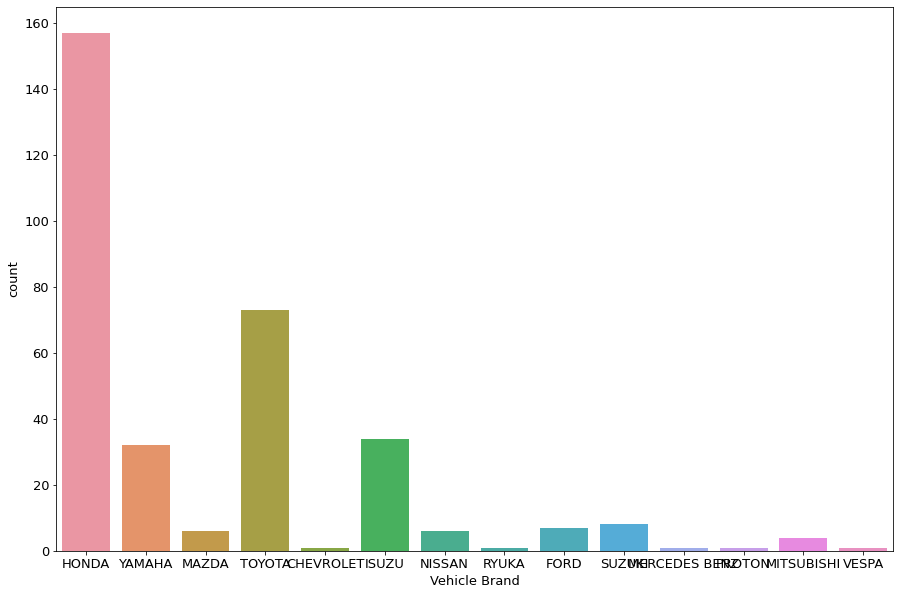

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(df['Vehicle Brand'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


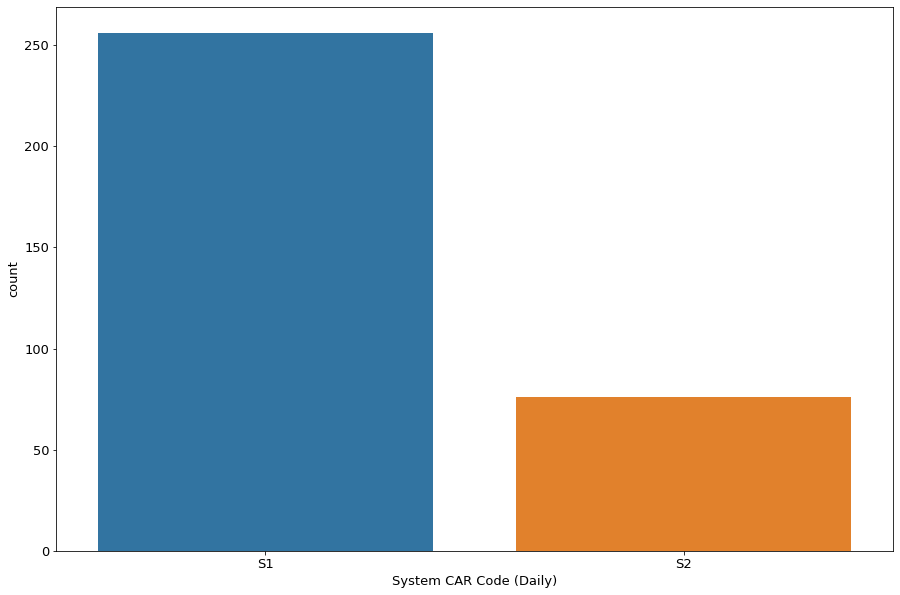

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(df['System CAR Code (Daily)'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


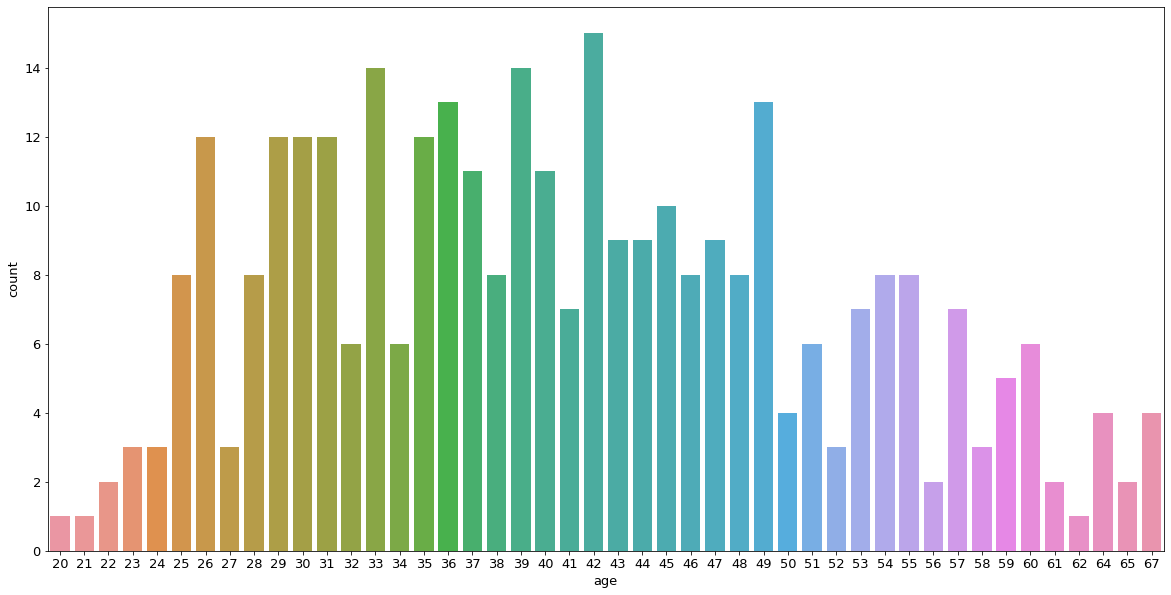

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(df['age'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


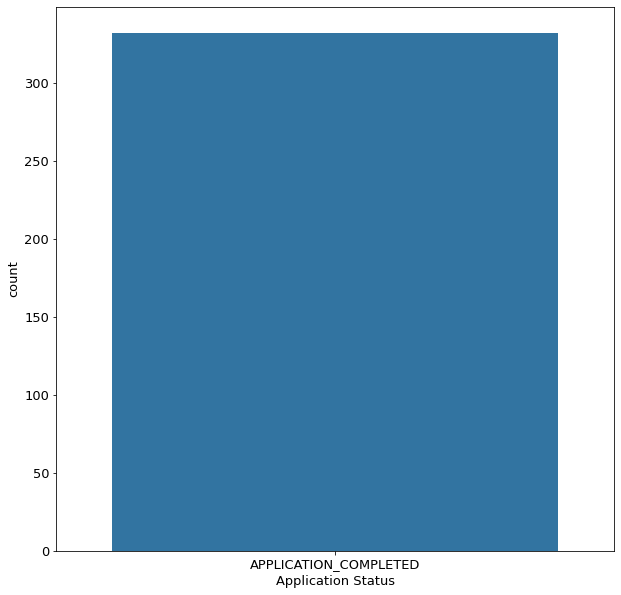

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(df['Application Status'])

####numerical

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


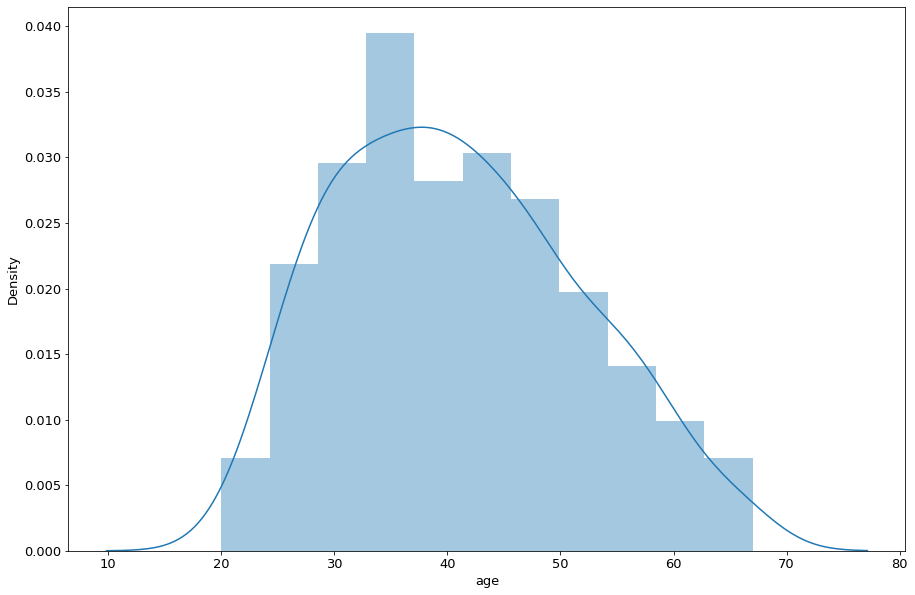

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(df['age'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


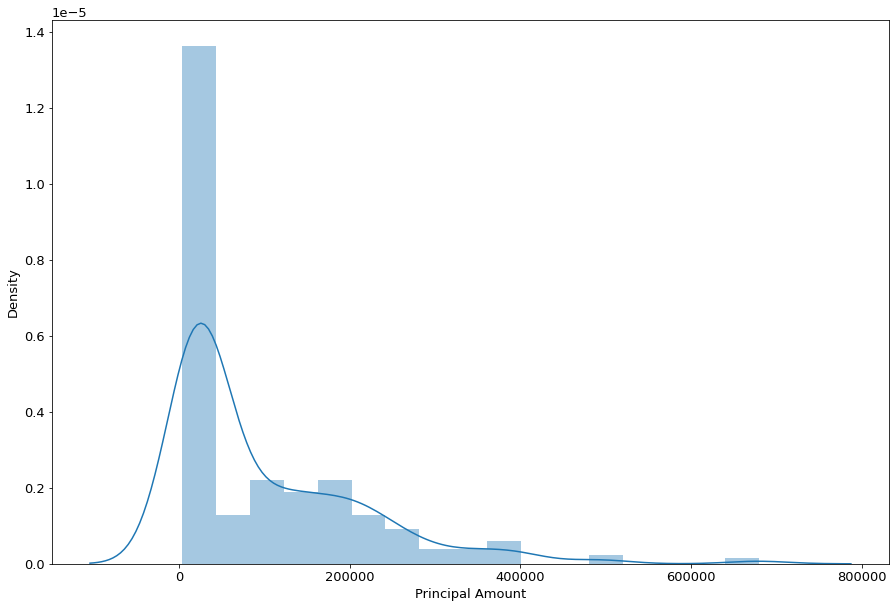

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(df['Principal Amount'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


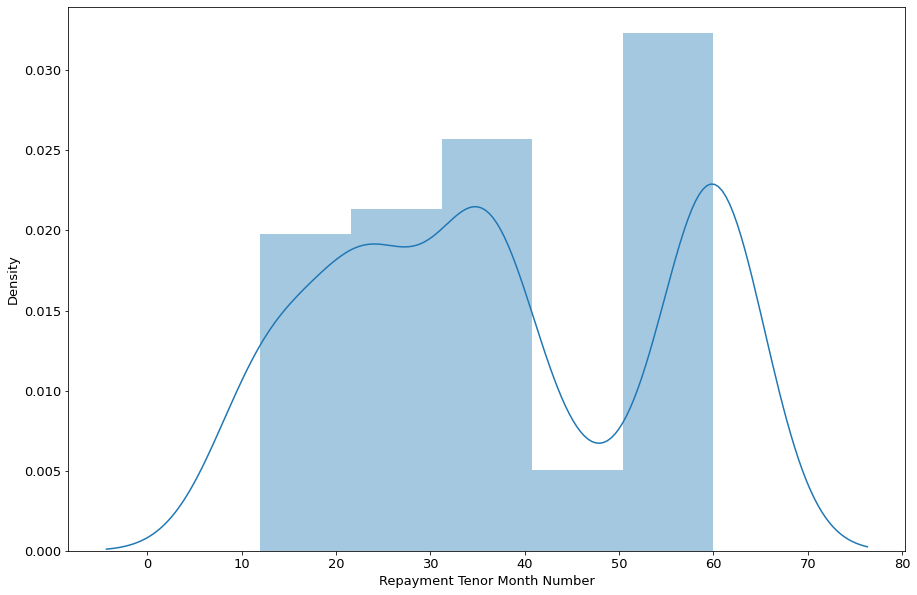

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(df['Repayment Tenor Month Number'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


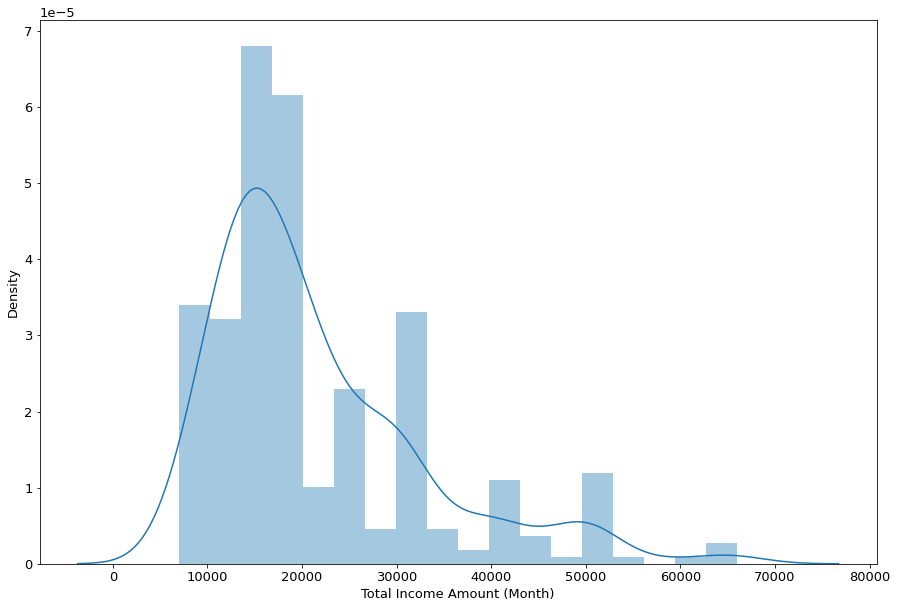

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(df['Total Income Amount (Month)'])

In [ ]:
train_df = df.drop(columns=['Application Number']) ## Dropping Application Number
categorical_columns = ['Gender','Occupation Description','Vehicle Age','Collateral Type Code','Vehicle Brand','System CAR Code (Daily)','age','Application Status']

print(categorical_columns)
numerical_columns = ['age','Principal Amount', 'Repayment Tenor Month Number','Total Income Amount (Month)']
print(numerical_columns)

['Gender', 'Occupation Description', 'Vehicle Age', 'Collateral Type Code', 'Vehicle Brand', 'System CAR Code (Daily)', 'age', 'Application Status']
['age', 'Principal Amount', 'Repayment Tenor Month Number', 'Total Income Amount (Month)']


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3614 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3609 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3633 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3585 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3591 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3634 missing from current font.
  font.set_text(s

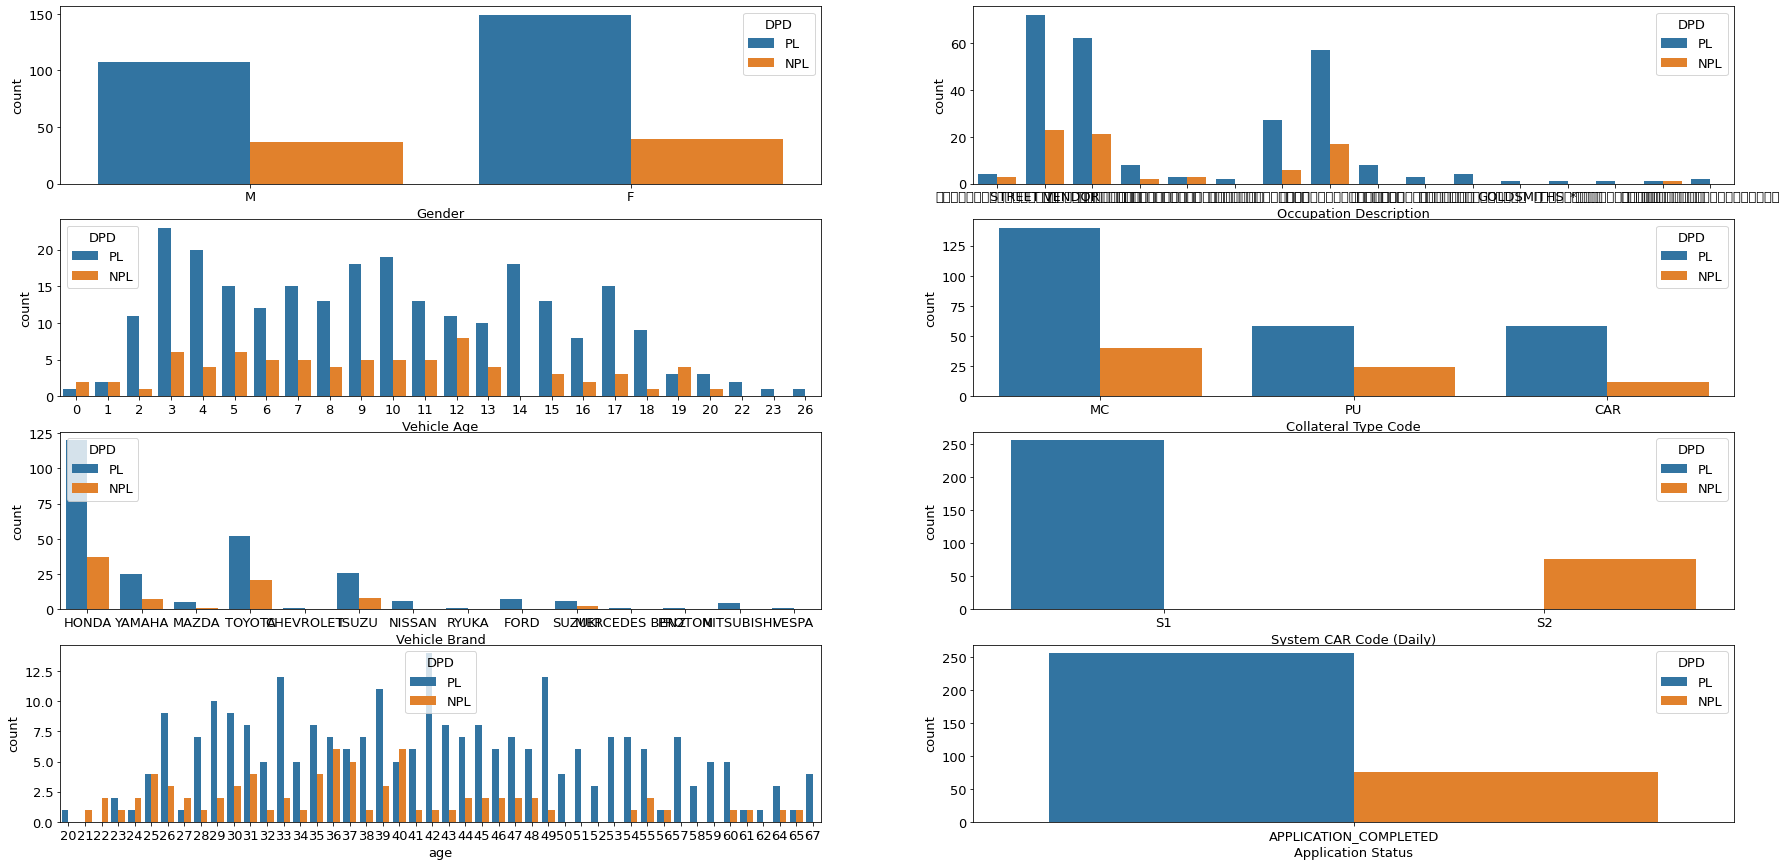

In [ ]:
### Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt


fig,axes = plt.subplots(4,2,figsize=(30,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=train_df,hue='DPD',ax=axes[row,col])


#plt.subplots_adjust(hspace=1)

IndexError: ignored

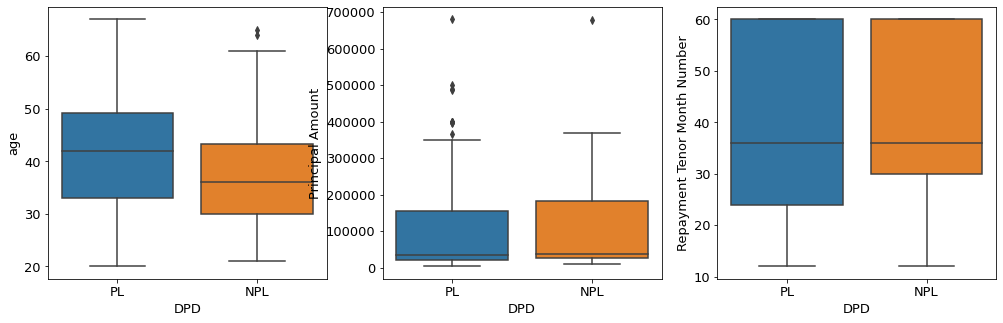

In [ ]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=train_df,x='DPD',ax=axes[idx])

print(train_df[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

In [ ]:
cols = ['Principal Approve Amount','Principal Amount','Total Income Amount (Month)','Repayment Tenor Month Number','age','Vehicle Age']

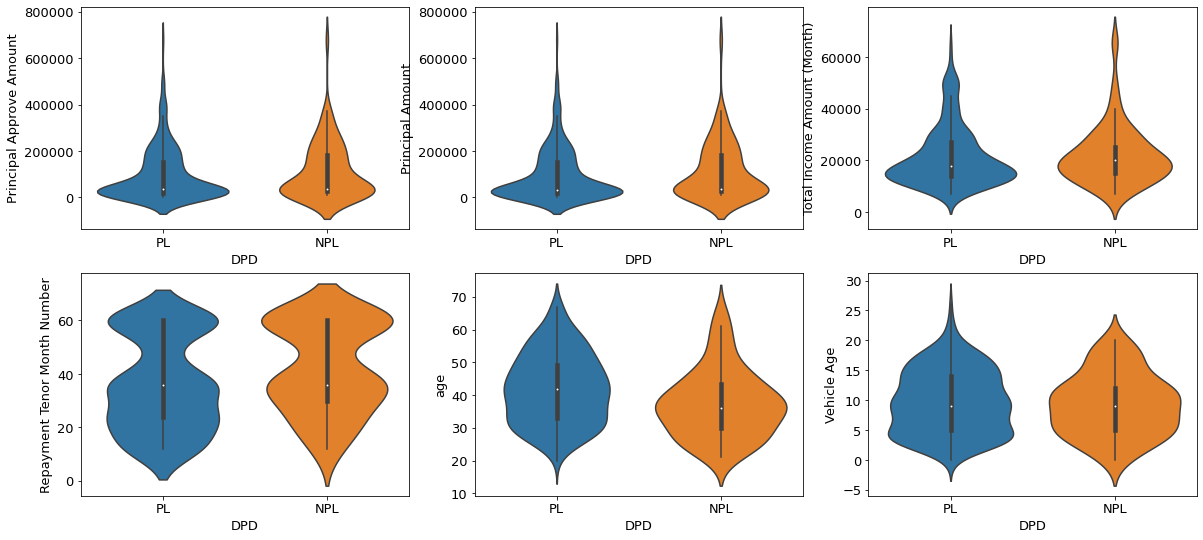

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,9))
ax = ax.ravel()
for i, col in enumerate(cols):
    sns.violinplot(x='DPD', y=col, data=df, ax=ax[i])

###correlation matrix

In [ ]:
corr = df.corr()
corr

,Principal Approve Amount,Principal Amount,Outstanding Balance Amount,Repayment Tenor Month Number,Total Income Amount (Month),Vehicle Release Year,Evaluation Amount,age,Vehicle Age
Principal Approve Amount,1.000000,0.999960,0.999808,0.708095,0.450723,-0.040630,0.953959,0.021381,0.040630
Principal Amount,0.999960,1.000000,0.999865,0.709383,0.450070,-0.040777,0.952963,0.021263,0.040777
Outstanding Balance Amount,0.999808,0.999865,1.000000,0.710117,0.450084,-0.041207,0.951938,0.020165,0.041207
Repayment Tenor Month Number,0.708095,0.709383,0.710117,1.000000,0.341317,-0.201456,0.656866,0.003797,0.201456
Total Income Amount (Month),0.450723,0.450070,0.450084,0.341317,1.000000,-0.049566,0.460943,0.189661,0.049566
Vehicle Release Year,-0.040630,-0.040777,-0.041207,-0.201456,-0.049566,1.000000,-0.081471,-0.190455,-1.000000
Evaluation Amount,0.953959,0.952963,0.951938,0.656866,0.460943,-0.081471,1.000000,0.040268,0.081471
age,0.021381,0.021263,0.020165,0.003797,0.189661,-0.190455,0.040268,1.000000,0.190455
Vehicle Age,0.040630,0.040777,0.041207,0.201456,0.049566,-1.000000,0.081471,0.190455,1.000000


In [ ]:
df.describe().round(2)

,Principal Approve Amount,Principal Amount,Outstanding Balance Amount,Repayment Tenor Month Number,Total Income Amount (Month),Vehicle Release Year,Evaluation Amount,age,Vehicle Age
count,332.00,332.00,332.00,332.00,332.00,332.00,332.00,332.00,332.00
mean,100384.19,100037.37,100952.85,37.46,21677.97,2012.38,154325.90,41.00,9.62
std,114182.35,114267.50,115361.20,17.35,11403.71,5.26,163956.98,10.80,5.26
min,3300.00,3159.50,3159.50,12.00,7000.00,1996.00,11000.00,20.00,0.00
25%,22750.00,22000.00,22476.06,24.00,14875.00,2008.00,35000.00,32.75,5.00
50%,35000.00,34165.72,34655.17,36.00,18150.00,2013.00,50500.00,40.00,9.00
75%,160000.00,160000.00,163076.36,60.00,26242.50,2017.00,254250.00,49.00,14.00
max,680000.00,680000.00,693901.29,60.00,66000.00,2022.00,856000.00,67.00,26.00


#Modeling

###Drop Columns ที่ไม่ใช้

In [ ]:
df.columns

Index(['Application Number', 'Principal Approve Amount', 'Principal Amount',
       'Outstanding Balance Amount', 'Repayment Tenor Month Number', 'Gender',
       'DOB', 'Occupation Description', 'Total Income Amount (Month)',
       'Collateral Type Code', 'Vehicle Brand', 'Vehicle Model',
       'Vehicle Release Year', 'Vehicle Sub Model', 'Evaluation Amount',
       'Insurance Policy Number', 'System CAR Code (Daily)',
       'System CAR Code Date', 'Final CAR Code Previous Month', 'DPD',
       'Application Status', 'age', 'Vehicle Age'],
      dtype='object')

In [ ]:
df2 = df.copy()

In [ ]:
cols = ['Application Number','DOB','Insurance Policy Number','Application Status']
df2 = df2.drop(columns=cols, axis=1)

In [ ]:
df2.head(2)

,Principal Approve Amount,Principal Amount,Outstanding Balance Amount,Repayment Tenor Month Number,Gender,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,Vehicle Model,Vehicle Release Year,Vehicle Sub Model,Evaluation Amount,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,age,Vehicle Age
0,32000.0,32000.00,32042.00,24,M,พนักงานส่งเอกสาร,25000.0,MC,HONDA,WAVE 110 I,2018,DI,43000.0,S1,2022-08-02,S1,PL,40,4
1,50000.0,49742.58,49742.58,36,F,STREET VENDOR,50000.0,MC,HONDA,ADV 150,2020,AB,80500.0,S1,2022-07-03,S1,PL,59,2


###LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Occupation Description','Collateral Type Code','Vehicle Brand','Vehicle Model','Vehicle Sub Model','System CAR Code (Daily)','Final CAR Code Previous Month']

le = LabelEncoder()
for col in cols:
    df2[col] = le.fit_transform(df2[col])

In [ ]:
df2.head(5)

,Principal Approve Amount,Principal Amount,Outstanding Balance Amount,Repayment Tenor Month Number,Gender,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,Vehicle Model,Vehicle Release Year,Vehicle Sub Model,Evaluation Amount,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,age,Vehicle Age
0,32000.0,32000.00,32042.00,24,1,10,25000.0,1,2,75,2018,80,43000.0,0,2022-08-02,0,PL,40,4
1,50000.0,49742.58,49742.58,36,0,2,50000.0,1,2,0,2020,1,80500.0,0,2022-07-03,0,PL,59,2
2,20000.0,20000.00,20020.00,24,0,2,20000.0,1,13,31,2020,13,27000.0,0,2022-07-26,0,PL,57,2
3,9000.0,9000.00,9009.00,12,0,11,15000.0,1,13,67,2011,4,12000.0,0,2022-08-02,0,PL,42,11
4,180000.0,180000.00,180000.00,60,1,5,31000.0,2,4,5,2011,28,283500.0,0,2022-07-07,0,PL,49,11


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 0 to 331
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Principal Approve Amount       332 non-null    float64       
 1   Principal Amount               332 non-null    float64       
 2   Outstanding Balance Amount     332 non-null    float64       
 3   Repayment Tenor Month Number   332 non-null    int64         
 4   Gender                         332 non-null    int64         
 5   Occupation Description         332 non-null    int64         
 6   Total Income Amount (Month)    332 non-null    float64       
 7   Collateral Type Code           332 non-null    int64         
 8   Vehicle Brand                  332 non-null    int64         
 9   Vehicle Model                  332 non-null    int64         
 10  Vehicle Release Year           332 non-null    int64         
 11  Vehicle Sub Model  

In [ ]:
corr = df2.corr()
corr

,Principal Approve Amount,Principal Amount,Outstanding Balance Amount,Repayment Tenor Month Number,Gender,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,Vehicle Model,Vehicle Release Year,Vehicle Sub Model,Evaluation Amount,System CAR Code (Daily),Final CAR Code Previous Month,age,Vehicle Age
Principal Approve Amount,1.000000,0.999960,0.999808,0.708095,0.055202,-0.055852,0.450723,0.292667,0.178322,-0.361210,-0.040630,0.187034,0.953959,0.059751,0.059751,0.021381,0.040630
Principal Amount,0.999960,1.000000,0.999865,0.709383,0.054294,-0.055249,0.450070,0.291617,0.177288,-0.361090,-0.040777,0.186138,0.952963,0.061225,0.061225,0.021263,0.040777
Outstanding Balance Amount,0.999808,0.999865,1.000000,0.710117,0.055530,-0.054704,0.450084,0.294110,0.177103,-0.361819,-0.041207,0.187916,0.951938,0.070067,0.070067,0.020165,0.041207
Repayment Tenor Month Number,0.708095,0.709383,0.710117,1.000000,0.056540,-0.082723,0.341317,0.069571,0.208163,-0.428111,-0.201456,0.206422,0.656866,0.142630,0.142630,0.003797,0.201456
Gender,0.055202,0.054294,0.055530,0.056540,1.000000,0.192849,0.059167,-0.019833,0.011378,-0.041415,-0.029014,0.041105,0.074984,0.058387,0.058387,0.095526,0.029014
Occupation Description,-0.055852,-0.055249,-0.054704,-0.082723,0.192849,1.000000,-0.268537,0.023630,-0.099607,0.152410,0.104645,0.017085,-0.081377,0.001093,0.001093,-0.147981,-0.104645
Total Income Amount (Month),0.450723,0.450070,0.450084,0.341317,0.059167,-0.268537,1.000000,0.075886,0.044413,-0.283920,-0.049566,0.098258,0.460943,0.016934,0.016934,0.189661,0.049566
Collateral Type Code,0.292667,0.291617,0.294110,0.069571,-0.019833,0.023630,0.075886,1.000000,-0.009747,-0.068115,0.083490,0.170522,0.298312,0.098180,0.098180,0.014075,-0.083490
Vehicle Brand,0.178322,0.177288,0.177103,0.208163,0.011378,-0.099607,0.044413,-0.009747,1.000000,-0.207575,-0.180094,0.034750,0.187767,0.034534,0.034534,0.084919,0.180094
Vehicle Model,-0.361210,-0.361090,-0.361819,-0.428111,-0.041415,0.152410,-0.283920,-0.068115,-0.207575,1.000000,0.267695,0.157271,-0.398122,-0.011177,-0.011177,-0.089934,-0.267695


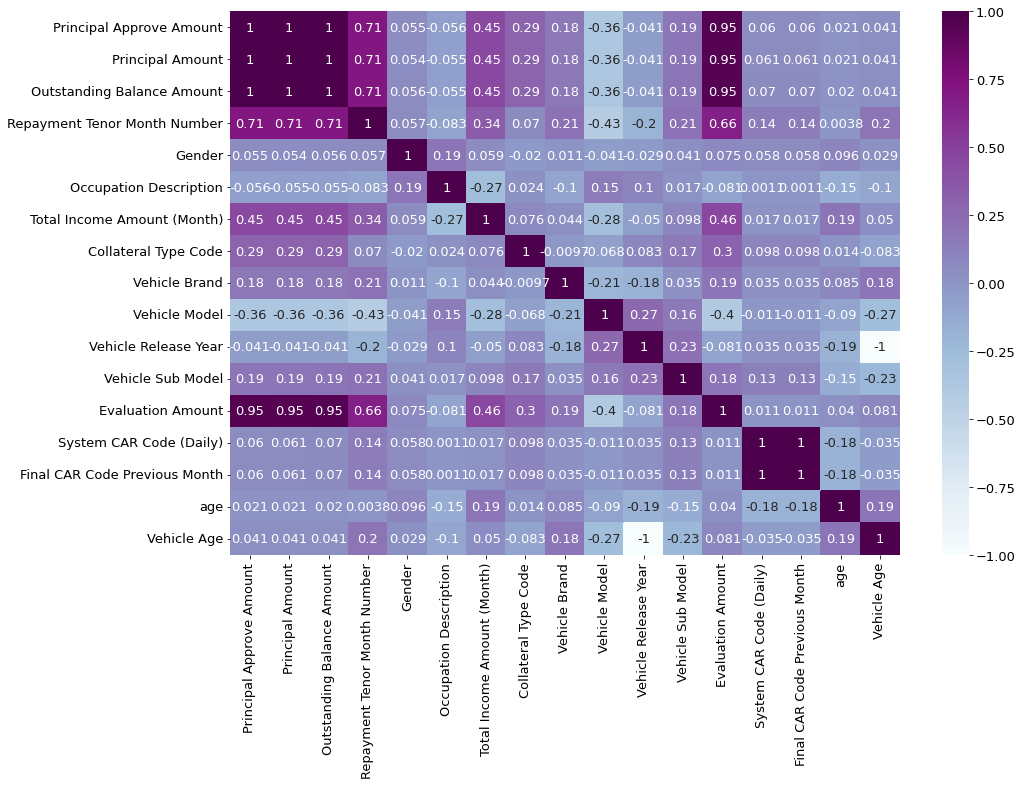

In [ ]:
corr = df2.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True, cmap="BuPu")

###ทดลอง Feature Importance

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df2.columns

Index(['Principal Approve Amount', 'Principal Amount',
       'Outstanding Balance Amount', 'Repayment Tenor Month Number', 'Gender',
       'Occupation Description', 'Total Income Amount (Month)',
       'Collateral Type Code', 'Vehicle Brand', 'Vehicle Model',
       'Vehicle Release Year', 'Vehicle Sub Model', 'Evaluation Amount',
       'System CAR Code (Daily)', 'System CAR Code Date',
       'Final CAR Code Previous Month', 'DPD', 'age', 'Vehicle Age'],
      dtype='object')

In [ ]:
df2.head(2)

,Principal Approve Amount,Principal Amount,Outstanding Balance Amount,Repayment Tenor Month Number,Gender,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,Vehicle Model,Vehicle Release Year,Vehicle Sub Model,Evaluation Amount,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,age,Vehicle Age
0,32000.0,32000.00,32042.00,24,1,10,25000.0,1,2,75,2018,80,43000.0,0,2022-08-02,0,PL,40,4
1,50000.0,49742.58,49742.58,36,0,2,50000.0,1,2,0,2020,1,80500.0,0,2022-07-03,0,PL,59,2


In [ ]:
'''cols = ['Principal Approve Amount', 'Principal Amount',
       'Outstanding Balance Amount', 'Repayment Tenor Month Number', 'Gender',
       'Occupation Description', 'Total Income Amount (Month)',
       'Collateral Type Code', 'Vehicle Brand', 'Vehicle Model',
       'Vehicle Release Year', 'Vehicle Sub Model', 'Evaluation Amount',
       'System CAR Code (Daily)','Final CAR Code Previous Month', 'age', 'Vehicle Age']'''

cols = ['Principal Approve Amount','Principal Amount','Outstanding Balance Amount','Repayment Tenor Month Number','Gender','Occupation Description','Total Income Amount (Month)','Collateral Type Code','Vehicle Brand','Evaluation Amount','age','Vehicle Age']

In [ ]:
X=df2[cols] #features
y = df2['DPD'] #label

In [ ]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, stratify=y, random_state=7
)

In [ ]:
from sklearn import tree


In [ ]:
model=DecisionTreeClassifier(criterion='entropy')

model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
X_train.columns

Index(['Principal Approve Amount', 'Principal Amount',
       'Outstanding Balance Amount', 'Repayment Tenor Month Number', 'Gender',
       'Occupation Description', 'Total Income Amount (Month)',
       'Collateral Type Code', 'Vehicle Brand', 'Evaluation Amount', 'age',
       'Vehicle Age'],
      dtype='object')

###Feature Importance

In [ ]:
model.feature_importances_

array([0.07352003, 0.07819147, 0.10215803, 0.04002553, 0.01810984,
       0.06795017, 0.12859661, 0.01533192, 0.        , 0.10171846,
       0.17691595, 0.197482  ])

In [ ]:
fs = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(
    ascending=False
)
fs

Vehicle Age                     0.197482
age                             0.176916
Total Income Amount (Month)     0.128597
Outstanding Balance Amount      0.102158
Evaluation Amount               0.101718
Principal Amount                0.078191
Principal Approve Amount        0.073520
Occupation Description          0.067950
Repayment Tenor Month Number    0.040026
Gender                          0.018110
Collateral Type Code            0.015332
Vehicle Brand                   0.000000
dtype: float64

In [ ]:
fs.sum()

0.9999999999999999

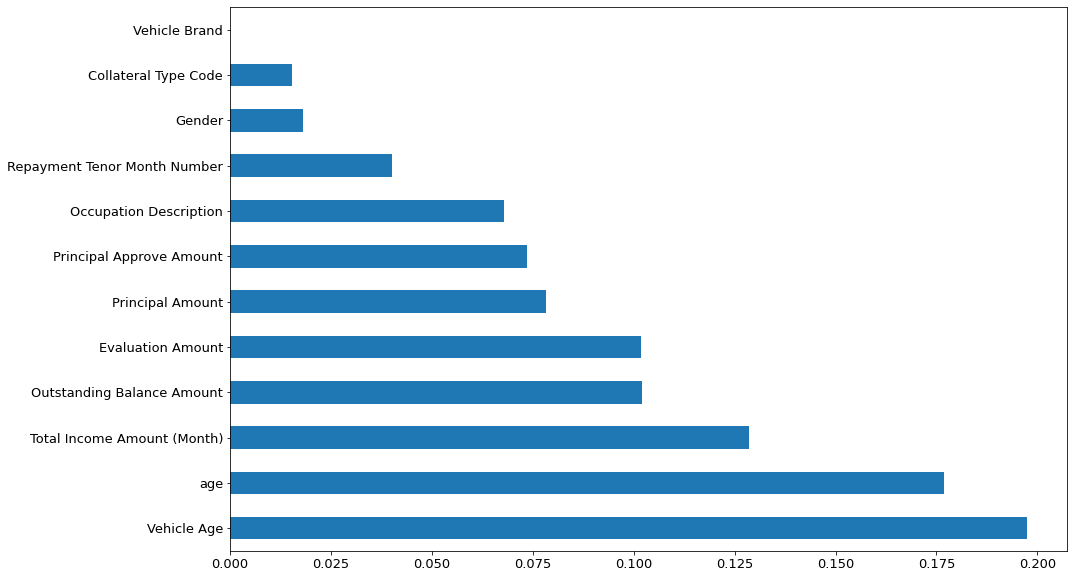

In [ ]:
plt.figure(figsize=(15,10))
fs.plot(kind='barh')

In [ ]:
corr = df2.corr()
corr

,Principal Approve Amount,Principal Amount,Outstanding Balance Amount,Repayment Tenor Month Number,Gender,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,Vehicle Model,Vehicle Release Year,Vehicle Sub Model,Evaluation Amount,System CAR Code (Daily),Final CAR Code Previous Month,age,Vehicle Age
Principal Approve Amount,1.000000,0.999960,0.999808,0.708095,0.055202,-0.055852,0.450723,0.292667,0.178322,-0.361210,-0.040630,0.187034,0.953959,0.059751,0.059751,0.021381,0.040630
Principal Amount,0.999960,1.000000,0.999865,0.709383,0.054294,-0.055249,0.450070,0.291617,0.177288,-0.361090,-0.040777,0.186138,0.952963,0.061225,0.061225,0.021263,0.040777
Outstanding Balance Amount,0.999808,0.999865,1.000000,0.710117,0.055530,-0.054704,0.450084,0.294110,0.177103,-0.361819,-0.041207,0.187916,0.951938,0.070067,0.070067,0.020165,0.041207
Repayment Tenor Month Number,0.708095,0.709383,0.710117,1.000000,0.056540,-0.082723,0.341317,0.069571,0.208163,-0.428111,-0.201456,0.206422,0.656866,0.142630,0.142630,0.003797,0.201456
Gender,0.055202,0.054294,0.055530,0.056540,1.000000,0.192849,0.059167,-0.019833,0.011378,-0.041415,-0.029014,0.041105,0.074984,0.058387,0.058387,0.095526,0.029014
Occupation Description,-0.055852,-0.055249,-0.054704,-0.082723,0.192849,1.000000,-0.268537,0.023630,-0.099607,0.152410,0.104645,0.017085,-0.081377,0.001093,0.001093,-0.147981,-0.104645
Total Income Amount (Month),0.450723,0.450070,0.450084,0.341317,0.059167,-0.268537,1.000000,0.075886,0.044413,-0.283920,-0.049566,0.098258,0.460943,0.016934,0.016934,0.189661,0.049566
Collateral Type Code,0.292667,0.291617,0.294110,0.069571,-0.019833,0.023630,0.075886,1.000000,-0.009747,-0.068115,0.083490,0.170522,0.298312,0.098180,0.098180,0.014075,-0.083490
Vehicle Brand,0.178322,0.177288,0.177103,0.208163,0.011378,-0.099607,0.044413,-0.009747,1.000000,-0.207575,-0.180094,0.034750,0.187767,0.034534,0.034534,0.084919,0.180094
Vehicle Model,-0.361210,-0.361090,-0.361819,-0.428111,-0.041415,0.152410,-0.283920,-0.068115,-0.207575,1.000000,0.267695,0.157271,-0.398122,-0.011177,-0.011177,-0.089934,-0.267695


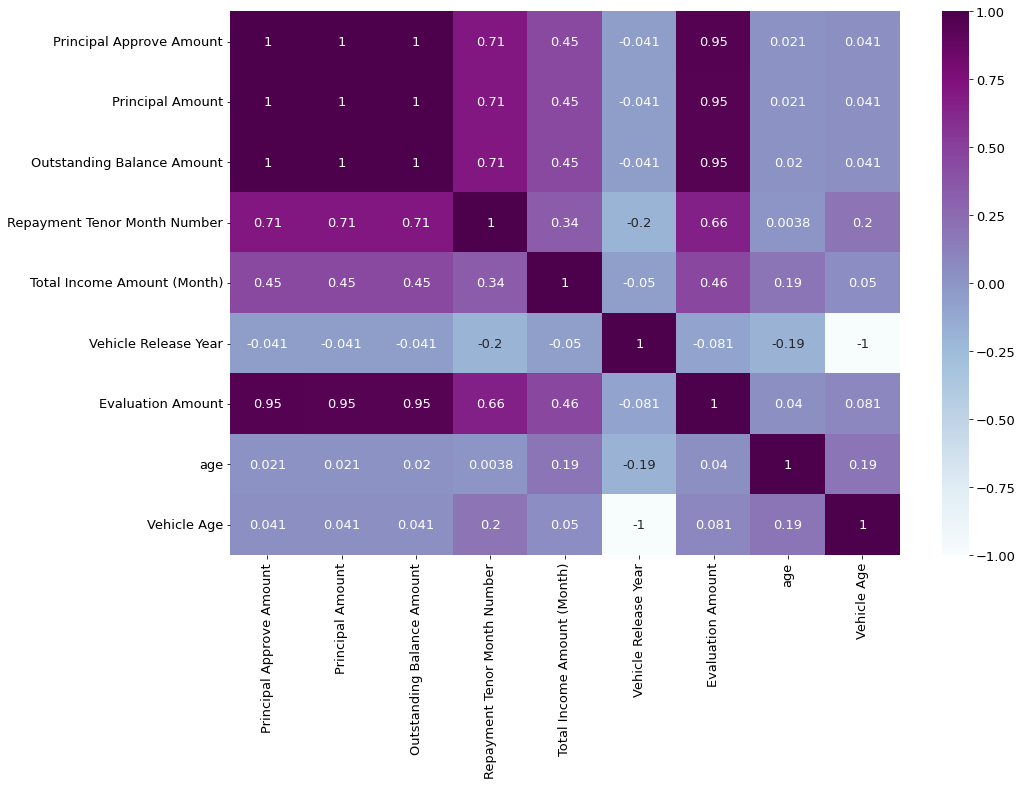

In [ ]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True, cmap="BuPu")

In [ ]:
df2

,Principal Approve Amount,Principal Amount,Outstanding Balance Amount,Repayment Tenor Month Number,Gender,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,Vehicle Model,Vehicle Release Year,Vehicle Sub Model,Evaluation Amount,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,age,Vehicle Age
0,32000.0,32000.00,32042.00,24,1,10,25000.0,1,2,75,2018,80,43000.0,0,2022-08-02,0,PL,40,4
1,50000.0,49742.58,49742.58,36,0,2,50000.0,1,2,0,2020,1,80500.0,0,2022-07-03,0,PL,59,2
2,20000.0,20000.00,20020.00,24,0,2,20000.0,1,13,31,2020,13,27000.0,0,2022-07-26,0,PL,57,2
3,9000.0,9000.00,9009.00,12,0,11,15000.0,1,13,67,2011,4,12000.0,0,2022-08-02,0,PL,42,11
4,180000.0,180000.00,180000.00,60,1,5,31000.0,2,4,5,2011,28,283500.0,0,2022-07-07,0,PL,49,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,270000.0,270000.00,273410.10,60,0,2,25000.0,2,3,19,2009,54,337500.0,1,2022-08-03,1,NPL,34,13
328,31500.0,31500.00,32152.03,24,1,11,10000.0,0,11,65,2003,4,105000.0,1,2022-08-04,1,NPL,36,19
329,33500.0,33500.00,34008.13,36,0,11,15000.0,1,2,75,2020,97,45000.0,1,2022-08-05,1,NPL,31,2
330,9000.0,9000.00,9145.22,12,0,8,20000.0,1,13,46,2010,4,12500.0,1,2022-08-06,1,NPL,36,12


#Evaluation

###Drop Cplomns ที่ไม่ใช้ออก

In [ ]:
cols = ['Principal Approve Amount','Vehicle Model', 'Vehicle Release Year', 'Vehicle Sub Model',
       'System CAR Code (Daily)',
       'System CAR Code Date', 'Final CAR Code Previous Month']
df2 = df2.drop(columns=cols, axis=1)
df2.head()

,Principal Amount,Outstanding Balance Amount,Repayment Tenor Month Number,Gender,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,Evaluation Amount,DPD,age,Vehicle Age
0,32000.00,32042.00,24,1,10,25000.0,1,2,43000.0,PL,40,4
1,49742.58,49742.58,36,0,2,50000.0,1,2,80500.0,PL,59,2
2,20000.00,20020.00,24,0,2,20000.0,1,13,27000.0,PL,57,2
3,9000.00,9009.00,12,0,11,15000.0,1,13,12000.0,PL,42,11
4,180000.00,180000.00,60,1,5,31000.0,2,4,283500.0,PL,49,11


In [ ]:
X = df2.drop(columns=['DPD'], axis=1)
y = df2['DPD']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [ ]:
from sklearn.model_selection import cross_val_score
def classify(model, x,y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
    model.fit(x_train, y_train)
    print("Accuracy is : ", model.score(x_test, y_test)*100)
    #Cross Calidation
    #eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross Validation is ", np.mean(score)*100)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model,X,y)

Accuracy is :  81.0
Cross Validation is  83.72229760289463


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model,X,y)

Accuracy is :  62.0
Cross Validation is  66.27770239710537


In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
model = RandomForestClassifier()
classify(model,X,y)

Accuracy is :  70.0
Cross Validation is  75.61736770691994


In [ ]:
model = ExtraTreesClassifier()
classify(model,X,y)

Accuracy is :  69.0
Cross Validation is  75.599276345545


In [ ]:
y_train.value_counts()

PL     181
NPL     51
Name: DPD, dtype: int64

In [ ]:
df2.columns

Index(['Principal Amount', 'Outstanding Balance Amount',
       'Repayment Tenor Month Number', 'Gender', 'Occupation Description',
       'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand',
       'Evaluation Amount', 'DPD', 'age', 'Vehicle Age'],
      dtype='object')

In [ ]:
#X = df2[['Principal Amount','Outstanding Balance Amount','Repayment Tenor Month Number', 'Gender', 'Occupation Description','Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand', 'age', 'Vehicle Age']]
X = df2[['Principal Amount','Repayment Tenor Month Number', 'Gender', 'Occupation Description','Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand', 'age', 'Vehicle Age']]
y = df2['DPD']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X ,y ,test_size=0.2, random_state=0)
X_train.shape

(265, 9)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy')
classifier = model.fit(X_train,y_train)
classifier

DecisionTreeClassifier(criterion='entropy')

In [ ]:
#prediction
y_pred = classifier.predict(X_test)
from sklearn import metrics
#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred)*100)

Accuracy Score: 65.67164179104478


In [ ]:
df2.columns

Index(['Principal Amount', 'Outstanding Balance Amount',
       'Repayment Tenor Month Number', 'Gender', 'Occupation Description',
       'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand',
       'Evaluation Amount', 'DPD', 'age', 'Vehicle Age'],
      dtype='object')

[Text(0.46064814814814814, 0.96875, 'node #0\nage <= 40.5\nentropy = 0.816\nsamples = 265\nvalue = [67, 198]\nclass = PL'),
 Text(0.2916666666666667, 0.90625, 'node #1\nTotal Income Amount (Month) <= 45300.0\nentropy = 0.926\nsamples = 135\nvalue = [46, 89]\nclass = PL'),
 Text(0.19444444444444445, 0.84375, 'node #2\nage <= 24.5\nentropy = 0.908\nsamples = 130\nvalue = [42, 88]\nclass = PL'),
 Text(0.07407407407407407, 0.78125, 'node #3\nPrincipal Amount <= 21841.165\nentropy = 0.918\nsamples = 9\nvalue = [6, 3]\nclass = NPL'),
 Text(0.04938271604938271, 0.71875, 'node #4\nTotal Income Amount (Month) <= 9400.0\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]\nclass = PL'),
 Text(0.024691358024691357, 0.65625, 'node #5\nentropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = NPL'),
 Text(0.07407407407407407, 0.65625, 'node #6\nentropy = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = PL'),
 Text(0.09876543209876543, 0.71875, 'node #7\nentropy = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = NPL'),
 Text(

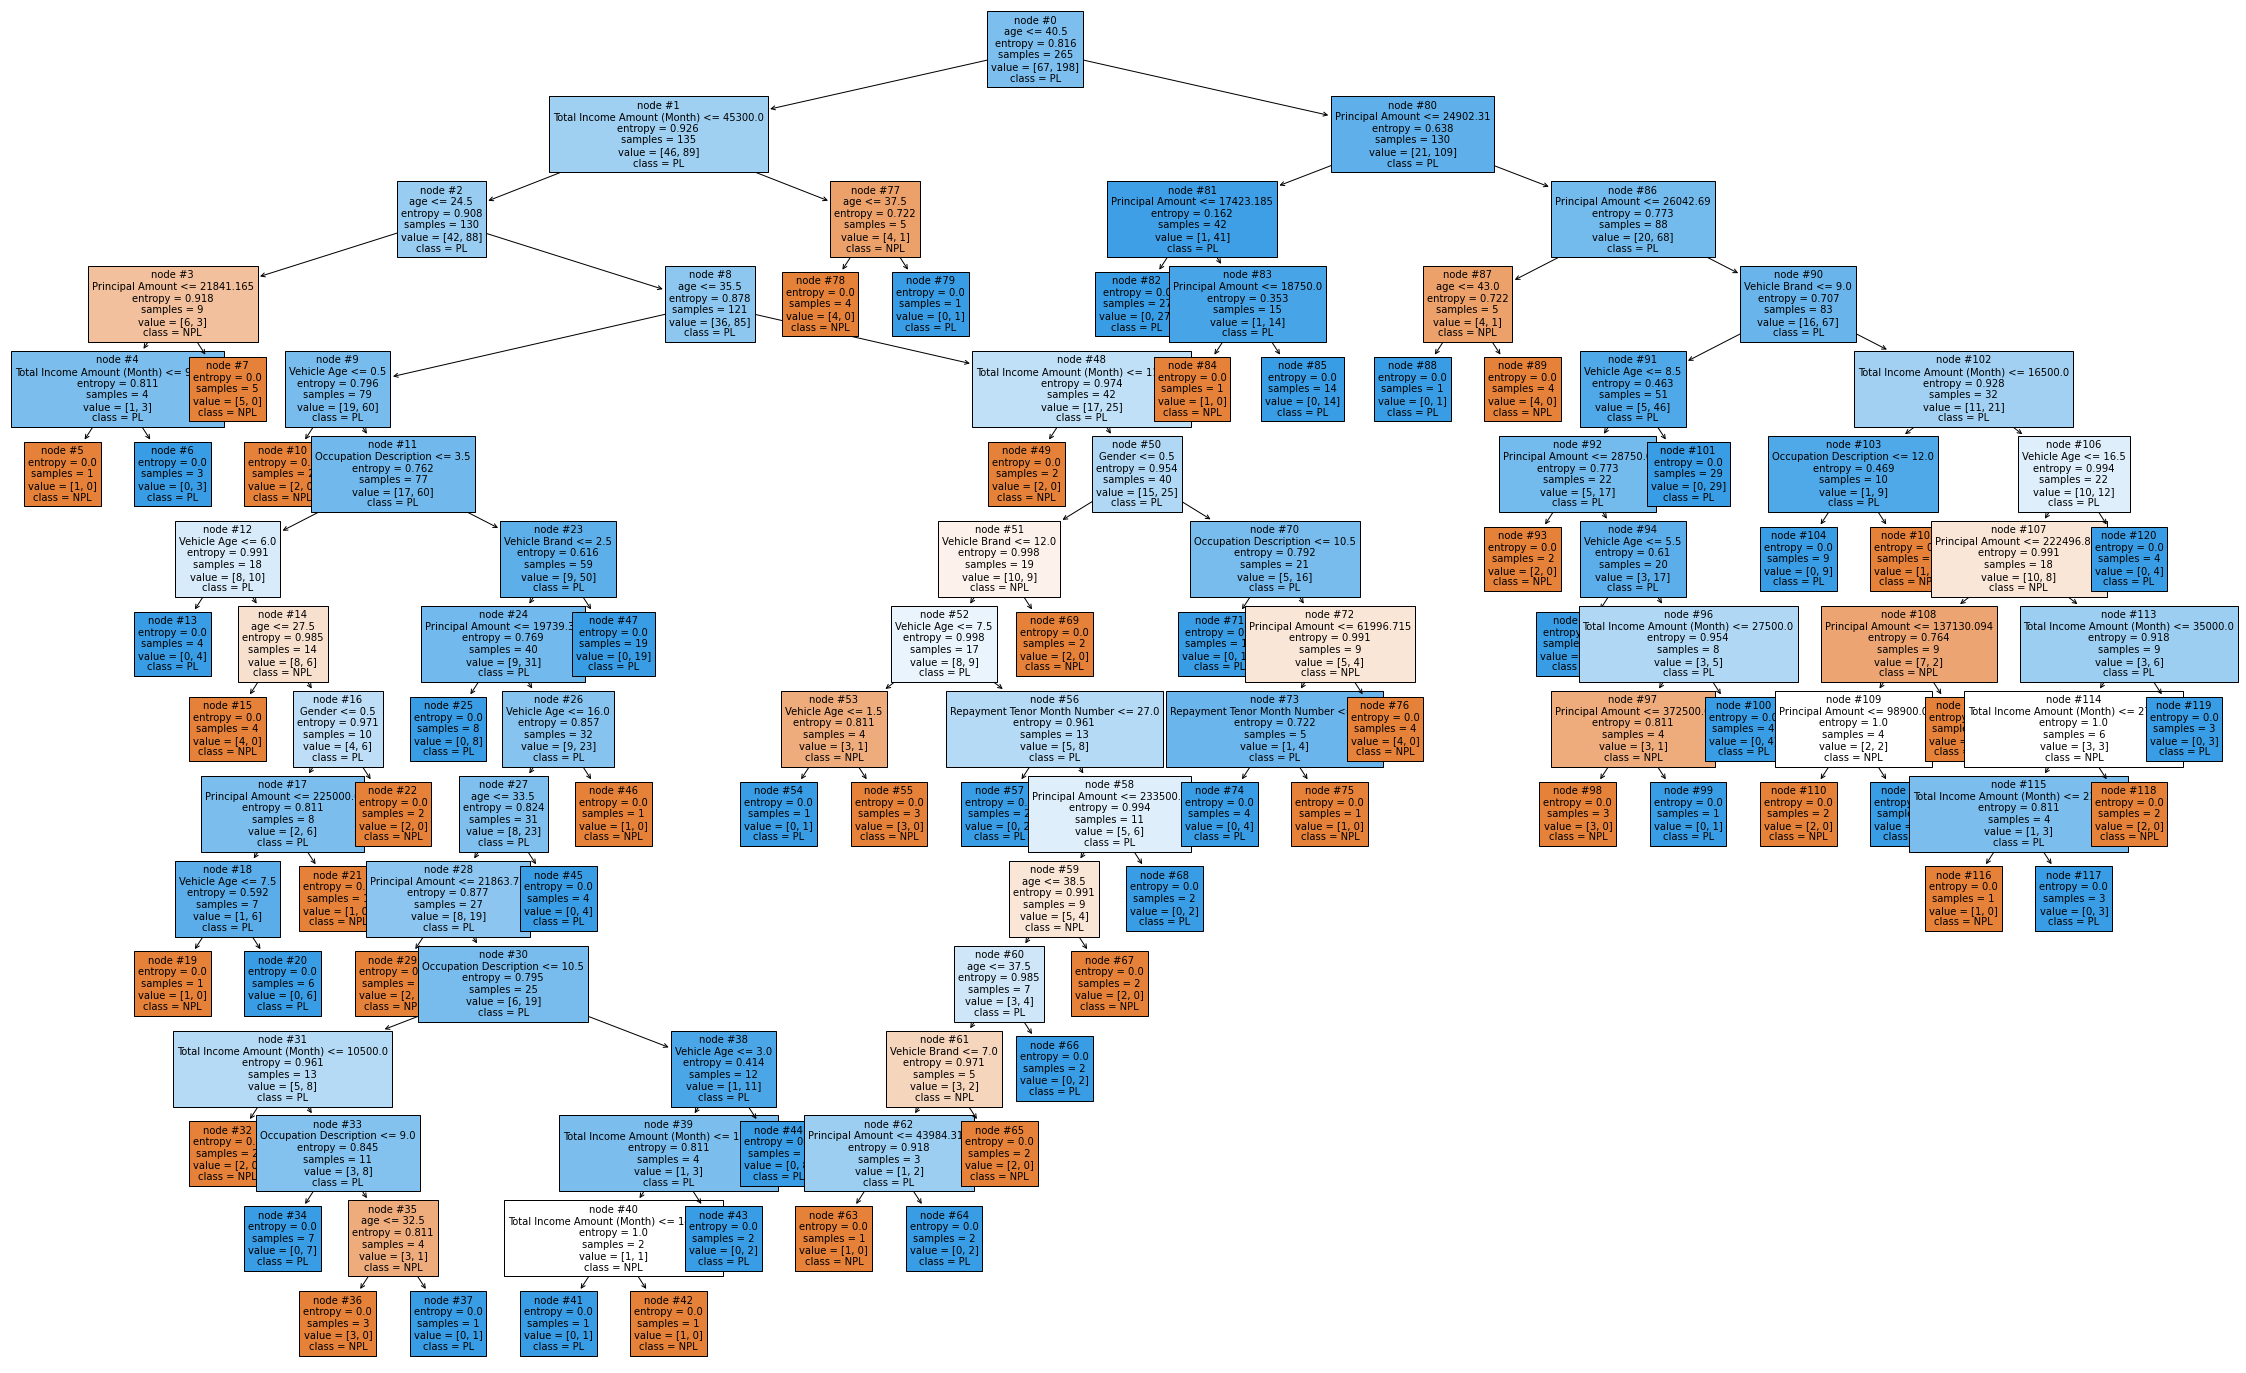

In [ ]:
from sklearn import tree
plt.figure(figsize=(40,25))
tree.plot_tree(classifier, 
                   #feature_names=['Principal Amount','Outstanding Balance Amount','Repayment Tenor Month Number', 'Gender', 'Occupation Description','Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand', 'age', 'Vehicle Age'],  
                   feature_names=['Principal Amount','Repayment Tenor Month Number', 'Gender', 'Occupation Description','Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand', 'age', 'Vehicle Age'],  
                   class_names=['NPL','PL'],
                   filled=True,node_ids=True,fontsize=10)

In [ ]:
# Create Decision Tree classifer object
# Train Decision Tree Classifer
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=4)
#Predict the response for test dataset
classifier = classifier.fit(X_train, y_train)
# Model Accuracy, how often is the classifier correct?
y_pred = classifier.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 80.59701492537313


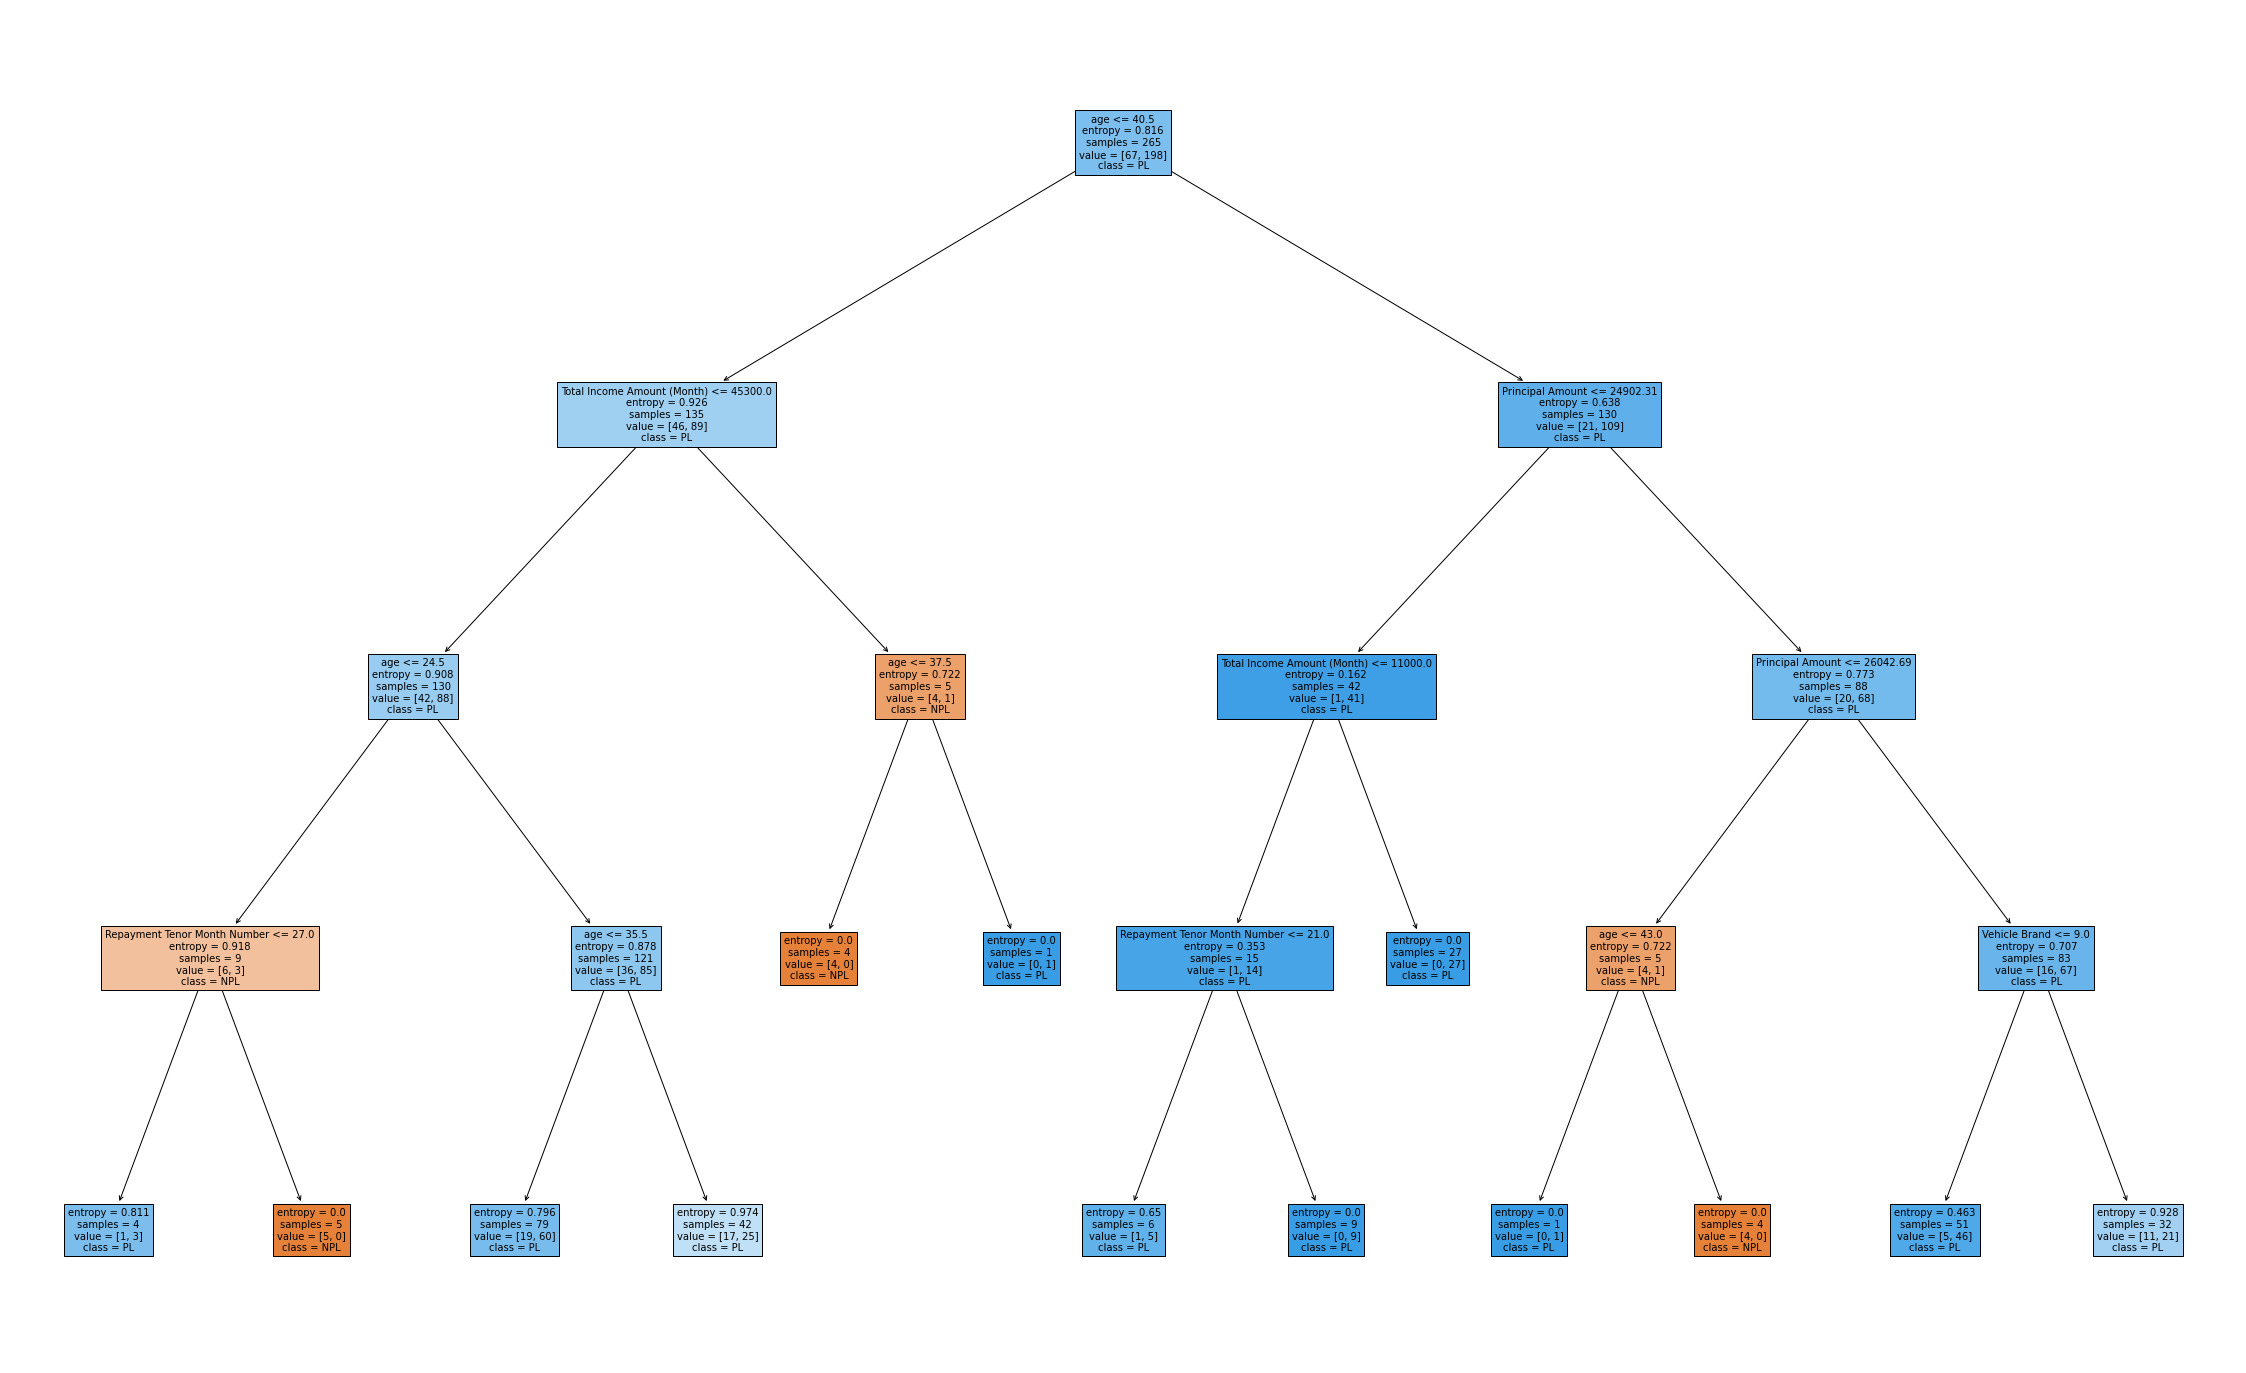

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(40,25))
_ = tree.plot_tree(classifier, 
                   #feature_names=['Principal Amount','Outstanding Balance Amount','Repayment Tenor Month Number', 'Gender', 'Occupation Description','Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand', 'age', 'Vehicle Age'],  
                   feature_names=['Principal Amount','Repayment Tenor Month Number', 'Gender', 'Occupation Description','Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand', 'age', 'Vehicle Age'],
                   class_names=['NPL','PL'],
                   filled=True, fontsize=10)

In [ ]:
import graphviz

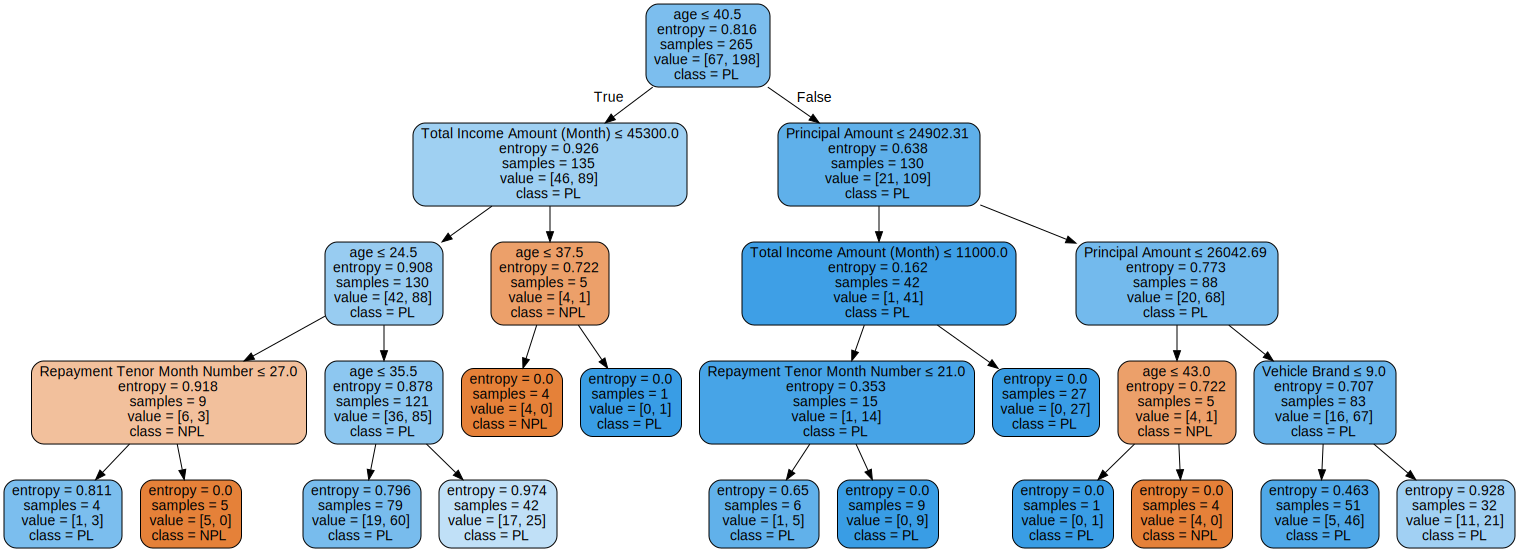

In [ ]:
dot_data = tree.export_graphviz(classifier, out_file=None,
                                #feature_names=['Principal Amount','Outstanding Balance Amount','Repayment Tenor Month Number', 'Gender', 'Occupation Description','Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand', 'age', 'Vehicle Age'],  
                                feature_names=['Principal Amount','Repayment Tenor Month Number', 'Gender', 'Occupation Description','Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand', 'age', 'Vehicle Age'],
                                class_names=['NPL','PL'],
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

#Deployment

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_test, y_pred)
print('Classification report  \n',cr)

Confusion matrix : 
 [[ 0  9]
 [ 4 54]]
Classification report  
               precision    recall  f1-score   support

         NPL       0.00      0.00      0.00         9
          PL       0.86      0.93      0.89        58

    accuracy                           0.81        67
   macro avg       0.43      0.47      0.45        67
weighted avg       0.74      0.81      0.77        67



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


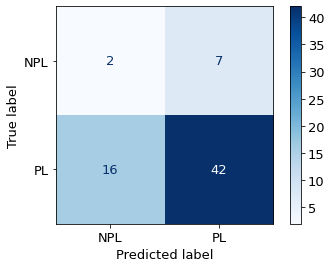

In [ ]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(model, X_test, y_test, cmap='Blues', values_format='d')